# DELHI FOR EVERYBODY

### IMPORTING LIBRARIES

In [105]:
#To handle dataframes and for exploratory analysis
import pandas as pd

#To get latitude and longitude values
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

#To clean data
import numpy as np

#To handle API requests
import requests

#To plot maps
import folium
import math

#For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex

#For model deployment
from sklearn.cluster import KMeans

print('Importing successful')

Importing successful


### SCRAPPING DATA

Scrape a list of postal codes and names in Delhi and store into a dataframe.

In [2]:
#Creating an object for the url of webpage containing information
url = 'https://dmsouthwest.delhi.gov.in/std-pin-codes/'

#Scrapping the table
full_df = pd.read_html(url)
full_df

[                 Area Name  Pin Code
 0    Ajmeri Gate Extension    110002
 1                  A G C R    110002
 2              Ansari Road    110002
 3                  Aliganj    110003
 4             Anand Parbat    110005
 ..                     ...       ...
 200             Minto Road    110002
 201            Model Basti    110005
 202              Mori Gate    110006
 203      Malka Ganj Market    110007
 204             Malka Ganj    110007
 
 [205 rows x 2 columns],
                      Area Name  Pin Code
 0            Mansarover Garden    110015
 1                   Moti Nagar    110015
 2                Malviya Nagar    110017
 3                Mahabir Nagar    110018
 4    Major Bhupinder Singh Nag    110018
 ..                         ...       ...
 200                Yusaf Sarai    110016
 201               Yamuna Vihar    110053
 202                    Zakhira    110015
 203               Zakhir Nagar    110025
 204                   Zafrabad    110053
 
 [205 rows 

### Merging tables into one

Since there are 2 different tables, for ease in handling, we will merge the tables into 1.

In [3]:
df1 = full_df[0]
df2 = full_df[1]

In [4]:
df1 = full_df[0]
df2 = full_df[1]
df = df1.append(df2, ignore_index = True)
df

Area Name  Pin Code
0    Ajmeri Gate Extension    110002
1                  A G C R    110002
2              Ansari Road    110002
3                  Aliganj    110003
4             Anand Parbat    110005
..                     ...       ...
405            Yusaf Sarai    110016
406           Yamuna Vihar    110053
407                Zakhira    110015
408           Zakhir Nagar    110025
409               Zafrabad    110053

[410 rows x 2 columns]

In [41]:
df.to_csv('delhi_postal.csv')

### GETTING COORDINATES OF AREAS

We do this by using the geocoder library.

In [5]:
#define a function to get coordinates

def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Delhi, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in df["Area Name"].tolist() ]

#Note: This might take upto 10mins

In [7]:
coords

[[28.643660000000068, 77.22883000000007],
 [28.630798037285533, 77.27580261992854],
 [28.646000000000072, 77.24387000000007],
 [28.583540000000028, 77.21856000000008],
 [28.66596000000004, 77.17322000000007],
 [28.67449000000005, 77.16756000000004],
 [28.64617000000004, 77.17691000000008],
 [28.575230000000033, 77.17823000000004],
 [28.591060000000027, 77.09117000000003],
 [28.717960000000062, 77.00396000000006],
 [28.692230000000052, 77.30124000000006],
 [28.653030000000058, 77.19165000000004],
 [28.575550000000078, 77.16103000000004],
 [28.678440000000023, 77.04939000000007],
 [28.720350000000053, 77.17264000000006],
 [29.68399000000005, 76.99117000000007],
 [28.682240000000036, 77.13977000000006],
 [28.798050000000046, 77.14426000000003],
 [28.519370000000038, 77.12126000000006],
 [28.634100000000046, 77.21689000000003],
 [28.47992000000005, 77.12542000000008],
 [28.553310000000067, 77.21457000000004],
 [28.56344000000007, 77.22897000000006],
 [28.664210000000026, 77.28112000000004]

In [8]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [9]:
# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [44]:
pd.set_option('display.max_rows', 1000)
df.to_csv('delhi_latlong.csv')
df

Area Name  Pin Code   Latitude  Longitude
0           Ajmeri Gate Extension    110002  28.643660  77.228830
1                         A G C R    110002  28.630798  77.275803
2                     Ansari Road    110002  28.646000  77.243870
3                         Aliganj    110003  28.583540  77.218560
4                    Anand Parbat    110005  28.665960  77.173220
5                     Anand Nagar    110005  28.674490  77.167560
6                       Army Base    110010  28.646170  77.176910
7                    A P S Colony    110010  28.575230  77.178230
8                       A F Palam    110010  28.591060  77.091170
9                          Ashram    110016  28.717960  77.003960
10                    Ashok Nagar    110018  28.692230  77.301240
11                   Ashoka Hotel    110021  28.653030  77.191650
12                  Anand Niketan    110021  28.575550  77.161030
13                    Amar Colony    110024  28.678440  77.049390
14                   Adarsh Nagar    110033  28.720350  77.172640
15                      A T Mills    110033  29.683990  76.991170
16             Anandvas Shakurpur    110034  28.682240  77.139770
17                         Alipur    110036  28.798050  77.144260
18                   A F Rajokari    110038  28.519370  77.121260
19                        Ambrohi    110045  28.634100  77.216890
20                     Arjan Garh    110047  28.479920  77.125420
21            Asian Games Village    110049  28.553310  77.214570
22                   Andrews Ganj    110049  28.563440  77.228970
23                     Azad Nagar    110051  28.664210  77.281120
24                       Anarkali    110051  28.693210  77.171900
25                Ashok Vihar H O    110052  28.410000  77.842450
26              Amrit Kaur Market    110055  28.643040  77.218180
27                 Ambedkar Nagar    110062  28.519490  77.235000
28                    Bank Street    110005  28.652903  77.190446
29                     Bara Tooti    110006  28.659770  77.213260
30                    Birla Lines    110007  28.676210  77.197160
31                     Bazar Road    110010  28.629764  77.231534
32               Bhola Nath Nagar    110032  28.672018  77.288615
33                   Balbir Nagar    110032  28.682480  77.289640
34           Bhaiparma Nand Nagar    110033  28.696710  77.303850
35                         Bawana    110039  28.800590  77.034730
36                     Budh Nagar    110041  28.634010  77.143380
37                          Badli    110042  28.731650  77.134060
38           Badarpur T P Station    110044  28.507380  77.303460
39                       Badarpur    110044  28.507380  77.303460
40                        Bakrola    110045  28.639220  77.012510
41                   Bharat Nagar    110052  28.566320  77.270110
42                     Bhajanpuri    110053  28.699880  77.259060
43                     Brahampuri    110053  28.653670  77.031250
44                       Bijwasan    110061  28.531910  77.052360
45               B S F Camp Tigri    110062  28.510210  77.237450
46                    Bhajan Pura    110096  28.699880  77.259060
47                Connaught Place    110001  28.633940  77.219680
48             Constitution House    110001  28.619820  77.212580
49                   Chawri Bazar    110006  28.648580  77.230710
50                  Chandni Chowk    110006  28.656270  77.232320
51                  C C Institute    110007  28.698040  77.206060
52              Central Ordinance    110010  28.596380  77.133010
53                Central Vehicle    110010  28.647112  77.219765
54                Central Tractor    110012  28.647112  77.219765
55            Central Kirti Nagar    110015  28.652980  77.142170
56                    Chand Nagar    110018  28.648070  77.096460
57                        C R R I    110020  28.653810  77.228970
58                    Chankyapuri    110021  28.595060  77.185730
59                    Civil Lines    110054  28.676710  77.21767

### DATA PREPARATION

### Check for empty values

In case the geocoder didn't find the latitudes or longitudes of an area, we drop them by first replacing the white spaces or '?' or 'na' values by NumPy NaN and then delete the rows using pd.dropna()

In [11]:
df = df.replace(r' ',np.nan)
df = df.replace('?', np.nan)
df.dropna(axis = 0) #axis = 0 to delete rows containing null values
df.shape

(410, 4)

### Checking data types

In [12]:
df.dtypes

Area Name     object
Pin Code       int64
Latitude     float64
Longitude    float64
dtype: object

### SAVE DATAFRAME

In [13]:
df.to_csv("delhi_data.csv", index = False)

In [4]:
# Opening the saved data to save time next time the program is run
df = pd.read_csv("delhi_data.csv")

### DELHI'S MAP WITH AREAS MARKED

In [15]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [16]:
# create map of Delhi using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Area Name'], df['Pin Code']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

In [17]:
# save the map as HTML file
map_delhi.save('delhi_map.html')

### USING FOURSQUARE API

### Defining Foursquare credentials and version

In [18]:
CLIENT_ID = 'IDWX2SA5Z01FXU4Z3W0EPTNSVRJAWPNP53QGQTUWEEA2ORAO' # your Foursquare ID
CLIENT_SECRET = '1MEG4DNVFGSYW3E1LKCQPOPHBXASKDRJC4XCJGLJ101GZTZY' # your Foursquare Secret
ACCESS_TOKEN = '1GFOVZMLAOLEW5TNOU0E02OCEZGMETUOWB2MFLYWQ4Q2LIZJ' # your FourSquare Access Token
VERSION = '20180605'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IDWX2SA5Z01FXU4Z3W0EPTNSVRJAWPNP53QGQTUWEEA2ORAO
CLIENT_SECRET:1MEG4DNVFGSYW3E1LKCQPOPHBXASKDRJC4XCJGLJ101GZTZY


### Getting 250 venues within 2km of postal offices

In [19]:
#Setting the radius
radius = 2000

#Setting the number of venues
LIMIT = 250

#List to store venues
venues = []

In [ ]:
for lat, long, area in zip(df['Latitude'], df['Longitude'], df['Area Name']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            area,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [27]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Area', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.tail()

(9183, 7)


Area  Latitude  Longitude  \
9178  New Delhi G P O  28.53545   77.27871   
9179  New Delhi G P O  28.53545   77.27871   
9180  New Delhi G P O  28.53545   77.27871   
9181  New Delhi G P O  28.53545   77.27871   
9182  New Delhi G P O  28.53545   77.27871   

                                 VenueName  VenueLatitude  VenueLongitude  \
9178                          Crowne Plaza      28.528749       77.272309   
9179            Sarita Vihar Metro Station      28.528533       77.288471   
9180  netaji subhash sports complex jasola      28.540851       77.290492   
9181                          Juice Corner      28.528585       77.289739   
9182                       Pocket C market      28.529981       77.292202   

      VenueCategory  
9178     Restaurant  
9179  Train Station  
9180   Soccer Field  
9181      Juice Bar  
9182         Market

In [31]:
new_df = df.iloc[233:,:]
new_df

Area Name  Pin Code   Latitude  Longitude
233            New Delhi G P O    110001  28.535450  77.278710
234                      Nidhi    110002  28.577850  77.231640
235              Nirman Bhawan    110011  28.610640  77.213900
236           N P Laboratories    110012  29.538650  75.707810
237      North Industrial Area    110015  28.664690  77.158000
238               N I E Compus    110016  28.632950  77.279700
239                Nehru Place    110019  28.550780  77.255490
240                  Nanakpura    110021  28.622880  77.113370
241               Netaji Nagar    110023  28.577460  77.185170
242             Najafgarh Road    110027  28.665872  77.161489
243              Naraina Vihar    110028  28.629760  77.133120
244                    Naraina    110028  28.631490  77.137130
245  Naraina Industrial Estate    110028  28.632900  77.138620
246              Nauroji Nagar    110029  28.569430  77.197470
247              New Seemapuri    110032  28.689400  77.327910
248            New Sabzi Mandi    110033  28.674940  77.288560
249           Nirankari Colony    110033  28.720630  77.208490
250               Nangli Poona    110036  28.776560  77.145130
251                Narela Town    110040  28.839790  77.076970
252                     Narela    110040  28.839790  77.076970
253                     Nagloi    110041  28.683600  77.041820
254          Nangloi Phase Iii    110041  28.746820  77.126590
255                  Najafgarh    110043  28.625100  76.997400
256                Nangal Rava    110046  28.606103  77.108384
257            N Block Greater    110048  28.556900  77.232770
258                      Nimri    110052  28.548630  77.212760
259         New Rajinder Nagar    110060  28.633505  77.173865
260                Nehru Nagar    110065  28.663950  77.166130
261         Nand Nagri A Block    110093  28.700330  77.309920
262                 Nand Nagri    110093  28.696710  77.303850
263               Nathu Colony    110093  28.689487  77.299106
264    Oberei Intercontinental    110003  28.647960  77.240270
265               Organisation    110012  28.628030  77.225560
266    Okhla Industrial Estate    110020  28.523872  77.276467
267                Onkar Nagar    110035  28.674410  77.160480
268           Parliament House    110001  28.617710  77.208840
269              Patiala House    110001  28.630030  77.220350
270      Parliament Street H O    110001  28.625460  77.214230
271             Pragati Maidan    110001  28.612530  77.245090
272               Pandara Road    110003  28.608110  77.229850
273              Pragati Vihar    110003  28.586700  77.234840
274             Patrachar Road    110007  28.708930  77.123720
275          Patrachar Vidyala    110007  28.708930  77.123720
276               Partap Nagar    110007  28.669770  77.195750
277              Pragati Vihar    110007  28.586700  77.234840
278           Patel Nagar East    110008  28.648170  77.178330
279                Patel Nagar    110008  28.647830  77.164490
280           Patel Nagar West    110008  28.647830  77.164490
281          Patel Nagar South    110008  28.645610  77.166820
282      Pushpa Vihar Sector I    110017  28.524297  77.225947
283          Panchseel Enclave    110017  28.544290  77.226510
284       Postal Saving Bureau    110022  28.634100  77.216890
285    Punjabi Bagh Sector Iii    110026  28.666340  77.125000
286               Punjabi Bagh    110026  28.666340  77.125000
287                  Pitampura    110034  28.695900  77.137250
288                Power House    110035  28.567470  77.199340
289              Palam Enclave    110045  30.657490  76.814770
290                      Palam    110045  28.591060  77.091170
291                  Paharganj    110055  28.645960  77.214920
292            P S B Paharganj    110055  28.645960  77.214920
293                Possangipur    110058  28.624220  77.083550
294              Pushpa Bhawan    110062  28.528650  77.232030
295              Paschim Vihar    110063  28.669330 

### NOTE:

Due to timeout error, the dataframe was divided into 2 to obtain the venues of the remaining areas.

In [ ]:
for lat, long, area in zip(new_df['Latitude'], new_df['Longitude'], new_df['Area Name']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            area,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [ ]:
# convert the venues list into a new DataFrame
venues_df2 = pd.DataFrame(venues)

# define the column names
venues_df2.columns = ['Area', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df2.shape)
venues_df2.head()

In [38]:
venues_df2.to_csv('delhi_venues.csv')

## EXPLORATORY DATA ANALYSIS

### Opening the saved CSV file

This is done to save time on scrapping data or API calls.

In [10]:
delhi_venues = pd.read_csv('delhi_venues.csv')
delhi_venues.head()

Unnamed: 0                   Area  Latitude  Longitude  \
0           0  Ajmeri Gate Extension  28.64366   77.22883   
1           1  Ajmeri Gate Extension  28.64366   77.22883   
2           2  Ajmeri Gate Extension  28.64366   77.22883   
3           3  Ajmeri Gate Extension  28.64366   77.22883   
4           4  Ajmeri Gate Extension  28.64366   77.22883   

                VenueName  VenueLatitude  VenueLongitude      VenueCategory  
0      Naturals Ice Cream      28.634455       77.222139     Ice Cream Shop  
1       Haveli Dharampura      28.653247       77.232309              Hotel  
2  Panchayat Paan Parlour      28.634073       77.222645  Indian Restaurant  
3             Sagar Ratna      28.635487       77.220650  Indian Restaurant  
4          Warehouse Cafe      28.633775       77.221015             Lounge

### NUMBER OF VENUES FOR EACH AREA

In [12]:
count_venues = delhi_venues.groupby(['Area']).count()
count_venues

Unnamed: 0  Latitude  Longitude  VenueName  VenueLatitude  \
Area                                                                      
A F Palam              5         5          5          5              5   
A F Rajokari           5         5          5          5              5   
A G C R               19        19         19         19             19   
A P S Colony          56        56         56         56             56   
A T Mills              5         5          5          5              5   
...                  ...       ...        ...        ...            ...   
Yamuna Vihar          11        11         11         11             11   
Yusaf Sarai          100       100        100        100            100   
Zafrabad               9         9          9          9              9   
Zakhir Nagar          26        26         26         26             26   
Zakhira               16        16         16         16             16   

              VenueLongitude  VenueCategory  
Area                                         
A F Palam                  5              5  
A F Rajokari               5              5  
A G C R                   19             19  
A P S Colony              56             56  
A T Mills                  5              5  
...                      ...            ...  
Yamuna Vihar              11             11  
Yusaf Sarai              100            100  
Zafrabad                   9              9  
Zakhir Nagar              26             26  
Zakhira                   16             16  

[398 rows x 7 columns]

### NUMBER OF UNIQUE CATEGORIES

In [13]:
print('There are {} uniques categories.'.format(len(delhi_venues['VenueCategory'].unique())))

There are 232 uniques categories.


### LIST OF UNIQUE CATEGORIES

In [15]:
print(delhi_venues['VenueCategory'].unique())

['Ice Cream Shop' 'Hotel' 'Indian Restaurant' 'Lounge' 'Café' 'Plaza'
 'Clothing Store' 'Tibetan Restaurant' 'Bakery' 'South Indian Restaurant'
 'Restaurant' 'Molecular Gastronomy Restaurant' 'Arcade'
 'Fast Food Restaurant' 'Paper / Office Supplies Store' 'Dessert Shop'
 'Hardware Store' 'Chinese Restaurant' 'Italian Restaurant' 'Coffee Shop'
 'Mosque' 'Pizza Place' 'Bar' 'Food & Drink Shop' 'Asian Restaurant'
 'BBQ Joint' 'Gastropub' 'Road' 'North Indian Restaurant' 'Art Gallery'
 'Market' 'Snack Place' 'Theater' 'Indian Chinese Restaurant' 'Food'
 'Flea Market' 'Monument / Landmark' 'Breakfast Spot' 'Motel'
 'History Museum' 'Museum' 'Hostel' 'Cricket Ground' 'Pub'
 'Falafel Restaurant' 'Hindu Temple' 'Shopping Mall' 'Light Rail Station'
 'Gift Shop' 'Convenience Store' 'Bus Station' 'River' 'Moving Target'
 'Stadium' 'Movie Theater' 'Historic Site' 'Deli / Bodega'
 'English Restaurant' 'Park' 'Japanese Restaurant' 'Athletics & Sports'
 'Sandwich Place' 'Mediterranean Restaurant' 'I

### FINDING OUT TOP 5 VENUES IN EACH AREA

### Performing one hot encoding

In [16]:
# one hot encoding
onehot = pd.get_dummies(delhi_venues[['VenueCategory']], prefix="", prefix_sep="")
onehot['Area'] = delhi_venues['Area'] 
# move postal, borough and neighborhood column to the first column
fixed_columns = list(onehot.columns[-1:]) + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot

Area  ATM  Accessories Store  Afghan Restaurant  \
0      Ajmeri Gate Extension    0                  0                  0   
1      Ajmeri Gate Extension    0                  0                  0   
2      Ajmeri Gate Extension    0                  0                  0   
3      Ajmeri Gate Extension    0                  0                  0   
4      Ajmeri Gate Extension    0                  0                  0   
...                      ...  ...                ...                ...   
16095               Zafrabad    0                  0                  0   
16096               Zafrabad    0                  0                  0   
16097               Zafrabad    0                  0                  0   
16098               Zafrabad    0                  0                  0   
16099               Zafrabad    0                  0                  0   

       Airport  Airport Food Court  American Restaurant  Antique Shop  Arcade  \
0            0                   0                    0             0       0   
1            0                   0                    0             0       0   
2            0                   0                    0             0       0   
3            0                   0                    0             0       0   
4            0                   0                    0             0       0   
...        ...                 ...                  ...           ...     ...   
16095        0                   0                    0             0       0   
16096        0                   0                    0             0       0   
16097        0                   0                    0             0       0   
16098        0                   0                    0             0       0   
16099        0                   0                    0             0       0   

       Art Gallery  ...  University  Vegetarian / Vegan Restaurant  \
0                0  ...           0                              0   
1                0  ...           0                              0   
2                0  ...           0                              0   
3                0  ...           0                              0   
4                0  ...           0                              0   
...            ...  ...         ...                            ...   
16095            0  ...           0                              0   
16096            0  ...           0                              0   
16097            0  ...           0                              0   
16098            0  ...           0                              1   
16099            0  ...           0                              0   

       Vietnamese Restaurant  Water Park  Whisky Bar  Wine Bar  Wings Joint  \
0                          0           0           0         0            0   
1                          0           0           0         0            0   
2                          0           0           0         0            0   
3                          0           0           0         0            0   
4                          0           0           0         0            0   
...                      ...         ...         ...       ...          ...   
16095                      0           0           0         0            0   
16096                      0           0           0         0            0   
16097                      0           0           0         0            0   
16098                      0           0           0         0            0   
16099                      0           0           0         0            0   

       Women's Store  Yoga Studio  Zoo  
0                  0            0    0  
1                  0            0    0  
2                  0            0    0  
3                  0            0    0  
4                  0            0    0  
...              ...          ...  ...  
16095              0            0    0  
16096              0            

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [17]:
delhi_grouped = onehot.groupby(["Area"]).mean().reset_index()
delhi_grouped

Area       ATM  Accessories Store  Afghan Restaurant  Airport  \
0       A F Palam  0.000000                0.0                0.0      0.0   
1    A F Rajokari  0.000000                0.0                0.0      0.0   
2         A G C R  0.000000                0.0                0.0      0.0   
3    A P S Colony  0.000000                0.0                0.0      0.0   
4       A T Mills  0.000000                0.0                0.0      0.0   
..            ...       ...                ...                ...      ...   
393  Yamuna Vihar  0.454545                0.0                0.0      0.0   
394   Yusaf Sarai  0.000000                0.0                0.0      0.0   
395      Zafrabad  0.000000                0.0                0.0      0.0   
396  Zakhir Nagar  0.000000                0.0                0.0      0.0   
397       Zakhira  0.000000                0.0                0.0      0.0   

     Airport Food Court  American Restaurant  Antique Shop    Arcade  \
0                   0.0                 0.00           0.0  0.000000   
1                   0.0                 0.00           0.0  0.000000   
2                   0.0                 0.00           0.0  0.052632   
3                   0.0                 0.00           0.0  0.000000   
4                   0.0                 0.00           0.0  0.000000   
..                  ...                  ...           ...       ...   
393                 0.0                 0.00           0.0  0.000000   
394                 0.0                 0.02           0.0  0.010000   
395                 0.0                 0.00           0.0  0.000000   
396                 0.0                 0.00           0.0  0.000000   
397                 0.0                 0.00           0.0  0.000000   

     Art Gallery  ...  University  Vegetarian / Vegan Restaurant  \
0           0.00  ...    0.000000                       0.000000   
1           0.00  ...    0.000000                       0.000000   
2           0.00  ...    0.000000                       0.000000   
3           0.00  ...    0.017857                       0.000000   
4           0.00  ...    0.000000                       0.000000   
..           ...  ...         ...                            ...   
393         0.00  ...    0.000000                       0.000000   
394         0.01  ...    0.000000                       0.000000   
395         0.00  ...    0.000000                       0.111111   
396         0.00  ...    0.000000                       0.000000   
397         0.00  ...    0.000000                       0.062500   

     Vietnamese Restaurant  Water Park  Whisky Bar  Wine Bar  Wings Joint  \
0                      0.0         0.0         0.0       0.0          0.0   
1                      0.0         0.0         0.0       0.0          0.0   
2                      0.0         0.0         0.0       0.0          0.0   
3                      0.0         0.0         0.0       0.0          0.0   
4                      0.0         0.0         0.0       0.0          0.0   
..                     ...         ...         ...       ...          ...   
393                    0.0         0.0         0.0       0.0          0.0   
394                    0.0         0.0         0.0       0.0          0.0   
395                    0.0         0.0         0.0       0.0          0.0   
396                    0.0         0.0         0.0       0.0          0.0   
397                    0.0         0.0         0.0       0.0          0.0   

     Women's Store  Yoga Studio  Zoo  
0         0.000000          0.0  0.0  
1         0.000000          0.0  0.0  
2         0.000000          0.0  0.0  
3         0.035714          0.0  0.0  
4         0.000000          0.0  0.0  
..             ...          ...  ...  
393       0.000000          0.0  0.0  
394       0.000000          0.0  0.0  
395       0.000000          0.0  0.0  
396       0.000000          0.0  0.0  
397       0.000000          0.0  0.0  



### Print top 5 venues from every area

In [18]:
top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ["Area"]
freqColumns = []
for ind in np.arange(top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Area'] = delhi_grouped['Area']

for ind in np.arange(delhi_grouped.shape[0]):
    row_categories = delhi_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(venues_sorted.shape)
venues_sorted.head()

(398, 6)


Area 1st Most Common Venue 2nd Most Common Venue  \
0     A F Palam    Chinese Restaurant                   Gym   
1  A F Rajokari                 Hotel           Coffee Shop   
2       A G C R           Pizza Place         Shopping Mall   
3  A P S Colony     Indian Restaurant                  Café   
4     A T Mills           Pizza Place            Steakhouse   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0           Coffee Shop            Hobby Shop  Fast Food Restaurant  
1         Shopping Mall        Clothing Store                   Zoo  
2    Chinese Restaurant          Hindu Temple           Bus Station  
3                 Hotel           Snack Place     French Restaurant  
4                 Hotel            Restaurant                   Zoo

### FINDING OUT QUALITY VENUES

We are only interested in certain venues.

In [19]:
search_query= ['Restaurant', 'Hotel', 'Farmers Market', 'Shopping Mall', 'Gym / Fitness Center', 'Pharmacy',
                         'Electronics Store', 'Indie Movie Theater', 'Light Rail Station','Metro Station', 'Train','Train Station', 'Garden',
                          'Theater','ATM', 'Office', 'Bus Station', 'Bank', 'Market' , 'Business Service', 'Monument / Landmark' ,
                          'Resort', 'Hospital', 'Police Station', 'School', 'College', 'Café' , 'Park', 'Playground',
                'Convention Center', 'College Auditorium', 'Government Building', 'Airport Terminal',
                         ]
print(len(search_query))

33


In [20]:
quality_dataframe = []
quality_dataframe= delhi_venues.loc[delhi_venues['VenueCategory'].isin(search_query)]
quality_dataframe.shape

(4296, 8)

In [40]:
quality_dataframe

Unnamed: 0                   Area  Latitude  Longitude  \
1               1  Ajmeri Gate Extension  28.64366   77.22883   
5               5  Ajmeri Gate Extension  28.64366   77.22883   
7               7  Ajmeri Gate Extension  28.64366   77.22883   
11             11  Ajmeri Gate Extension  28.64366   77.22883   
12             12  Ajmeri Gate Extension  28.64366   77.22883   
...           ...                    ...       ...        ...   
16092       16092               Zafrabad  28.67970   77.27151   
16094       16094               Zafrabad  28.67970   77.27151   
16095       16095               Zafrabad  28.67970   77.27151   
16096       16096               Zafrabad  28.67970   77.27151   
16097       16097               Zafrabad  28.67970   77.27151   

                                               VenueName  VenueLatitude  \
1                                      Haveli Dharampura      28.653247   
5                 Immigrants Project - A Cafe in History      28.634055   
7                 bloomrooms @ New Delhi Railway Station      28.645537   
11                                          Odeon Social      28.634414   
12     The Prime Balaji Deluxe @ New Delhi Railway St...      28.645247   
...                                                  ...            ...   
16092                              Welcome Metro Station      28.671902   
16094                            Seelampur Metro Station      28.669805   
16095                                       Shivaji park      28.682657   
16096                                       yamuna vihar      28.689816   
16097                             Shahdara Metro Station      28.673344   

       VenueLongitude       VenueCategory  
1           77.232309               Hotel  
5           77.218867                Café  
7           77.217701               Hotel  
11          77.220936                Café  
12          77.217433               Hotel  
...               ...                 ...  
16092       77.277772  Light Rail Station  
16094       77.266846       Train Station  
16095       77.285503                Park  
16096       77.283876                Park  
16097       77.289011  Light Rail Station  

[4296 rows x 8 columns]

### TOTAL QUALITY INFRASTRUCTURE

In [22]:
# one hot encoding
quality_onehot = pd.get_dummies(quality_dataframe[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
quality_onehot['Area'] = quality_dataframe['Area'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(quality_onehot.columns[-1:]) + list(quality_onehot.columns[:-1])
quality_onehot = quality_onehot[fixed_columns]

print(quality_onehot.shape)
print(quality_onehot.columns.values)
quality_onehot

(4296, 25)
['Area' 'ATM' 'Bank' 'Bus Station' 'Business Service' 'Café'
 'Electronics Store' 'Farmers Market' 'Garden' 'Government Building'
 'Gym / Fitness Center' 'Hotel' 'Indie Movie Theater' 'Light Rail Station'
 'Market' 'Metro Station' 'Monument / Landmark' 'Park' 'Pharmacy'
 'Playground' 'Resort' 'Restaurant' 'Shopping Mall' 'Theater'
 'Train Station']


Area  ATM  Bank  Bus Station  Business Service  Café  \
1      Ajmeri Gate Extension    0     0            0                 0     0   
5      Ajmeri Gate Extension    0     0            0                 0     1   
7      Ajmeri Gate Extension    0     0            0                 0     0   
11     Ajmeri Gate Extension    0     0            0                 0     1   
12     Ajmeri Gate Extension    0     0            0                 0     0   
...                      ...  ...   ...          ...               ...   ...   
16092               Zafrabad    0     0            0                 0     0   
16094               Zafrabad    0     0            0                 0     0   
16095               Zafrabad    0     0            0                 0     0   
16096               Zafrabad    0     0            0                 0     0   
16097               Zafrabad    0     0            0                 0     0   

       Electronics Store  Farmers Market  Garden  Government Building  ...  \
1                      0               0       0                    0  ...   
5                      0               0       0                    0  ...   
7                      0               0       0                    0  ...   
11                     0               0       0                    0  ...   
12                     0               0       0                    0  ...   
...                  ...             ...     ...                  ...  ...   
16092                  0               0       0                    0  ...   
16094                  0               0       0                    0  ...   
16095                  0               0       0                    0  ...   
16096                  0               0       0                    0  ...   
16097                  0               0       0                    0  ...   

       Metro Station  Monument / Landmark  Park  Pharmacy  Playground  Resort  \
1                  0                    0     0         0           0       0   
5                  0                    0     0         0           0       0   
7                  0                    0     0         0           0       0   
11                 0                    0     0         0           0       0   
12                 0                    0     0         0           0       0   
...              ...                  ...   ...       ...         ...     ...   
16092              0                    0     0         0           0       0   
16094              0                    0     0         0           0       0   
16095              0                    0     1         0           0       0   
16096              0                    0     1         0           0       0   
16097              0                    0     0         0           0       0   

       Restaurant  Shopping Mall  Theater  Train Station  
1               0              0        0              0  
5               0              0        0              0  
7               0              0        0              0  
11              0              0        0              0  
12              0              0        0              0  
...           ...            ...      ...            ...  
16092           0              0        0              0  
16094           0              0        0              1  
16095           0              0        0              0  
16096           0              0        0              0  
16097           0              0        0              0  

[4296 rows x 25 columns]

In [23]:
quality_grouped = quality_onehot.groupby(["Area"]).sum().reset_index()
quality_grouped

Area  ATM  Bank  Bus Station  Business Service  Café  \
0    A F Rajokari    0     0            0                 0     0   
1         A G C R    0     0            1                 0     1   
2    A P S Colony    0     0            0                 0     4   
3       A T Mills    0     0            0                 0     0   
4    Adarsh Nagar    0     1            1                 0     0   
..            ...  ...   ...          ...               ...   ...   
380  Yamuna Vihar    5     0            0                 0     0   
381   Yusaf Sarai    0     0            0                 0     8   
382      Zafrabad    0     0            0                 0     0   
383  Zakhir Nagar    0     0            0                 0     2   
384       Zakhira    0     0            0                 0     1   

     Electronics Store  Farmers Market  Garden  Government Building  ...  \
0                    0               0       0                    0  ...   
1                    0               0       0                    0  ...   
2                    0               0       0                    0  ...   
3                    0               0       0                    0  ...   
4                    0               0       0                    0  ...   
..                 ...             ...     ...                  ...  ...   
380                  1               0       0                    0  ...   
381                  0               0       1                    0  ...   
382                  0               0       0                    0  ...   
383                  0               0       0                    0  ...   
384                  0               0       0                    0  ...   

     Metro Station  Monument / Landmark  Park  Pharmacy  Playground  Resort  \
0                0                    0     0         0           0       0   
1                0                    0     0         0           0       0   
2                0                    0     1         0           0       0   
3                0                    0     0         0           0       0   
4                0                    0     1         0           0       0   
..             ...                  ...   ...       ...         ...     ...   
380              0                    0     1         0           0       0   
381              0                    0     3         0           0       0   
382              0                    0     2         0           0       0   
383              0                    0     0         0           1       0   
384              0                    0     0         0           0       0   

     Restaurant  Shopping Mall  Theater  Train Station  
0             0              1        0              0  
1             1              2        0              0  
2             1              1        0              0  
3             1              0        0              0  
4             0              0        0              0  
..          ...            ...      ...            ...  
380           0              0        0              0  
381           3              0        1              1  
382           0              0        0              1  
383           0              0        0              1  
384           0              0        0              6  

[385 rows x 25 columns]

In [38]:
quality_grouped['Total infrastructure'] =  quality_grouped[quality_grouped.drop(['Area'], axis=1).columns.values].sum(axis=1)
quality_grouped.to_csv('delhi_quality.csv')
quality_grouped

Area  ATM  Bank  Bus Station  Business Service  Café  \
0    A F Rajokari    0     0            0                 0     0   
1         A G C R    0     0            1                 0     1   
2    A P S Colony    0     0            0                 0     4   
3       A T Mills    0     0            0                 0     0   
4    Adarsh Nagar    0     1            1                 0     0   
..            ...  ...   ...          ...               ...   ...   
380  Yamuna Vihar    5     0            0                 0     0   
381   Yusaf Sarai    0     0            0                 0     8   
382      Zafrabad    0     0            0                 0     0   
383  Zakhir Nagar    0     0            0                 0     2   
384       Zakhira    0     0            0                 0     1   

     Electronics Store  Farmers Market  Garden  Government Building  ...  \
0                    0               0       0                    0  ...   
1                    0               0       0                    0  ...   
2                    0               0       0                    0  ...   
3                    0               0       0                    0  ...   
4                    0               0       0                    0  ...   
..                 ...             ...     ...                  ...  ...   
380                  1               0       0                    0  ...   
381                  0               0       1                    0  ...   
382                  0               0       0                    0  ...   
383                  0               0       0                    0  ...   
384                  0               0       0                    0  ...   

     Monument / Landmark  Park  Pharmacy  Playground  Resort  Restaurant  \
0                      0     0         0           0       0           0   
1                      0     0         0           0       0           1   
2                      0     1         0           0       0           1   
3                      0     0         0           0       0           1   
4                      0     1         0           0       0           0   
..                   ...   ...       ...         ...     ...         ...   
380                    0     1         0           0       0           0   
381                    0     3         0           0       0           3   
382                    0     2         0           0       0           0   
383                    0     0         0           1       0           0   
384                    0     0         0           0       0           0   

     Shopping Mall  Theater  Train Station  Total infrastructure  
0                1        0              0                    12  
1                2        0              0                    24  
2                1        0              0                    44  
3                0        0              0                     8  
4                0        0              0                    16  
..             ...      ...            ...                   ...  
380              0        0              0                    28  
381              0        1              1                    80  
382              0        0              1                    20  
383              0        0              1                    32  
384              0        0              6                    40  

[385 rows x 26 columns]

### Bad infrastructure in Delhi

In [28]:
badquality = quality_grouped[quality_grouped['Total infrastructure'] == quality_grouped['Total infrastructure'].min()]
badquality

Area  ATM  Bank  Bus Station  Business Service  Café  \
32                Bawana    0     0            0                 0     0   
39              Bijwasan    0     0            0                 0     0   
41            Brahampuri    0     0            0                 1     0   
71      Delhi High Court    0     0            0                 0     0   
88          Gandhi Nagar    0     0            0                 0     0   
91          Geeta Colony    0     0            0                 0     0   
126           J J Colony    1     0            0                 0     0   
145        Jharoda Kalan    0     0            0                 1     0   
158              Khanpur    0     0            0                 0     0   
196           Mangolpuri    0     0            0                 1     0   
197   Mangolpuri Block 1    0     0            0                 1     0   
199   Mangolpuri Block S    0     0            0                 0     0   
217      Multani Mohalla    0     0            0                 0     0   
223            Najafgarh    0     0            0                 0     0   
228          Nangal Rava    0     0            0                 0     0   
232               Narela    0     0            0                 0     0   
233          Narela Town    0     0            0                 0     0   
242        New Seemapuri    0     0            0                 0     0   
254  P T S Jharoda Kalan    0     0            0                 1     0   
295         Raghubarpura    0     0            0                 0     0   
302     Ramesh Nagar H O    0     0            0                 0     0   
318               Sanoth    1     0            0                 0     0   
370       Vasant Vihar I    0     0            0                 0     0   

     Electronics Store  Farmers Market  Garden  Government Building  ...  \
32                   0               0       0                    0  ...   
39                   0               0       0                    0  ...   
41                   0               0       0                    0  ...   
71                   1               0       0                    0  ...   
88                   0               0       0                    0  ...   
91                   0               0       0                    0  ...   
126                  0               0       0                    0  ...   
145                  0               0       0                    0  ...   
158                  0               0       0                    0  ...   
196                  0               0       0                    0  ...   
197                  0               0       0                    0  ...   
199                  0               0       0                    0  ...   
217                  0               0       0                    0  ...   
223                  1               0       0                    0  ...   
228                  0               0       0                    0  ...   
232                  1               0       0                    0  ...   
233                  1               0       0                    0  ...   
242                  0               0       0                    0  ...   
254                  0               0       0                    0  ...   
295                  0               0       0                    0  ...   
302                  0               0       0                    0  ...   
318                  0               0       0                    0  ...   
370                  0               0       0                    0  ...   

     Monument / Landmark  Park  Pharmacy  Playground  Resort  Restaurant  \
32                     0     0         0           1       0           0   
39                     0     0         0           0       0           0   
41                     0     0         0           0       0           0   
71                     0     0         0           0       0      

### WORST AREA FOR A PARTICULAR VENUE

Enter a particular venue category, and see the areas with worst venues to look for improvement opportunities.

In [29]:
#select for worst
yourchoiceinfra = 'Restaurant' # Select your choice of infrastructue from VenueCategory
badqualitychoice = quality_grouped[quality_grouped[yourchoiceinfra] == quality_grouped[yourchoiceinfra].min()]
badqualitychoice[['Area', 'Restaurant']]

Area  Restaurant
0     A F Rajokari           0
4     Adarsh Nagar           0
8      Amar Colony           0
12     Anand Nagar           0
13   Anand Niketan           0
..             ...         ...
379      Work Shop           0
380   Yamuna Vihar           0
382       Zafrabad           0
383   Zakhir Nagar           0
384        Zakhira           0

[176 rows x 2 columns]

### ENTER AN AREA AND SEE ROOM FOR GROWTH

Enter an area and see what all venue categories can be upgraded.

In [30]:
yourchoicearea = 'Zakhira'   # Change with the name of postal area where you want to see potential
infraqualitychoice = quality_grouped[quality_grouped['Area'] == yourchoicearea].transpose()
infraqualitychoice = infraqualitychoice.reset_index()

In [31]:
print("These are infrastructures with highest potential in" , yourchoicearea, "area : " )
for i in range(len(infraqualitychoice)) : 
    if (infraqualitychoice.iloc[i, 1] == 0):
        print(infraqualitychoice.iloc[i, 0])

These are infrastructures with highest potential in Zakhira area : 
ATM
Bank
Bus Station
Business Service
Electronics Store
Farmers Market
Garden
Government Building
Gym / Fitness Center
Indie Movie Theater
Market
Metro Station
Monument / Landmark
Park
Pharmacy
Playground
Resort
Restaurant
Shopping Mall
Theater


### EXPLORATORY DATA ANALYSIS

In [45]:
delhi_venues = pd.read_csv('delhi_venues.csv')
delhi_venues

Unnamed: 0                   Area  Latitude  Longitude  \
0               0  Ajmeri Gate Extension  28.64366   77.22883   
1               1  Ajmeri Gate Extension  28.64366   77.22883   
2               2  Ajmeri Gate Extension  28.64366   77.22883   
3               3  Ajmeri Gate Extension  28.64366   77.22883   
4               4  Ajmeri Gate Extension  28.64366   77.22883   
...           ...                    ...       ...        ...   
16095       16095               Zafrabad  28.67970   77.27151   
16096       16096               Zafrabad  28.67970   77.27151   
16097       16097               Zafrabad  28.67970   77.27151   
16098       16098               Zafrabad  28.67970   77.27151   
16099       16099               Zafrabad  28.67970   77.27151   

                    VenueName  VenueLatitude  VenueLongitude  \
0          Naturals Ice Cream      28.634455       77.222139   
1           Haveli Dharampura      28.653247       77.232309   
2      Panchayat Paan Parlour      28.634073       77.222645   
3                 Sagar Ratna      28.635487       77.220650   
4              Warehouse Cafe      28.633775       77.221015   
...                       ...            ...             ...   
16095            Shivaji park      28.682657       77.285503   
16096            yamuna vihar      28.689816       77.283876   
16097  Shahdara Metro Station      28.673344       77.289011   
16098               Halidrams      28.675918       77.290126   
16099              McDonald's      28.663433       77.278282   

                       VenueCategory  
0                     Ice Cream Shop  
1                              Hotel  
2                  Indian Restaurant  
3                  Indian Restaurant  
4                             Lounge  
...                              ...  
16095                           Park  
16096                           Park  
16097             Light Rail Station  
16098  Vegetarian / Vegan Restaurant  
16099           Fast Food Restaurant  

[16100 rows x 8 columns]

In [46]:
df_very = delhi_venues.groupby(['Area']).count()
df_very

Unnamed: 0  Latitude  Longitude  VenueName  \
Area                                                                       
A F Palam                              5         5          5          5   
A F Rajokari                           5         5          5          5   
A G C R                               19        19         19         19   
A P S Colony                          56        56         56         56   
A T Mills                              5         5          5          5   
Adarsh Nagar                           8         8          8          8   
Ajmeri Gate Extension                100       100        100        100   
Aliganj                               66        66         66         66   
Alipur                                 4         4          4          4   
Amar Colony                            8         8          8          8   
Ambedkar Nagar                        74        74         74         74   
Ambrohi                              100       100        100        100   
Amrit Kaur Market                    100       100        100        100   
Anand Nagar                           14        14         14         14   
Anand Niketan                         36        36         36         36   
Anand Parbat                          14        14         14         14   
Anandvas Shakurpur                    25        25         25         25   
Anarkali                              25        25         25         25   
Andrews Ganj                         100       100        100        100   
Ansari Road                           36        36         36         36   
Arjan Garh                             9         9          9          9   
Army Base                             37        37         37         37   
Ashok Nagar                            4         4          4          4   
Ashok Vihar H O                        5         5          5          5   
Ashoka Hotel                          35        35         35         35   
Asian Games Village                  100       100        100        100   
Azad Nagar                            12        12         12         12   
B S F Camp Tigri                       7         7          7          7   
Badarpur                               7         7          7          7   
Badarpur T P Station                   7         7          7          7   
Badli                                  6         6          6          6   
Bakrola                                1         1          1          1   
Balbir Nagar                           8         8          8          8   
Bank Street                           37        37         37         37   
Bara Tooti                            40        40         40         40   
Bawana                                 1         1          1          1   
Bazar Road                           100       100        100        100   
Bhaiparma Nand Nagar                   8         8          8          8   
Bhajan Pura                            8         8          8          8   
Bhajanpuri                             8         8          8          8   
Bharat Nagar                          35        35         35         35   
Bhola Nath Nagar                      16        16         16         16   
Bijwasan                               5         5          5          5   
Birla Lines                           23        23         23         23   
Brahampuri                             1         1          1          1   
Budh Nagar                             8         8          8          8   
C C Institute                         43        43         43         43   
C R P F Camp                          13        13         13         13   
C R R I                               63        63         63         63   
Central Kirti Nagar                   35        35         35         35   
Central Ordinance                      9         9          9          9   
Ce

In [47]:
print('There are {} uniques categories.'.format(len(delhi_venues['VenueCategory'].unique())))

There are 232 uniques categories.


In [48]:
delhi_venues['VenueCategory'].unique()

array(['Ice Cream Shop', 'Hotel', 'Indian Restaurant', 'Lounge', 'Café',
       'Plaza', 'Clothing Store', 'Tibetan Restaurant', 'Bakery',
       'South Indian Restaurant', 'Restaurant',
       'Molecular Gastronomy Restaurant', 'Arcade',
       'Fast Food Restaurant', 'Paper / Office Supplies Store',
       'Dessert Shop', 'Hardware Store', 'Chinese Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Mosque', 'Pizza Place',
       'Bar', 'Food & Drink Shop', 'Asian Restaurant', 'BBQ Joint',
       'Gastropub', 'Road', 'North Indian Restaurant', 'Art Gallery',
       'Market', 'Snack Place', 'Theater', 'Indian Chinese Restaurant',
       'Food', 'Flea Market', 'Monument / Landmark', 'Breakfast Spot',
       'Motel', 'History Museum', 'Museum', 'Hostel', 'Cricket Ground',
       'Pub', 'Falafel Restaurant', 'Hindu Temple', 'Shopping Mall',
       'Light Rail Station', 'Gift Shop', 'Convenience Store',
       'Bus Station', 'River', 'Moving Target', 'Stadium',
       'Movie Theater

In [49]:
# one hot encoding
onehot = pd.get_dummies(delhi_venues[['VenueCategory']], prefix="", prefix_sep="")
onehot['Area'] = delhi_venues['Area'] 
# move postal, borough and neighborhood column to the first column
fixed_columns = list(onehot.columns[-1:]) + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot

Area  ATM  Accessories Store  Afghan Restaurant  \
0      Ajmeri Gate Extension    0                  0                  0   
1      Ajmeri Gate Extension    0                  0                  0   
2      Ajmeri Gate Extension    0                  0                  0   
3      Ajmeri Gate Extension    0                  0                  0   
4      Ajmeri Gate Extension    0                  0                  0   
...                      ...  ...                ...                ...   
16095               Zafrabad    0                  0                  0   
16096               Zafrabad    0                  0                  0   
16097               Zafrabad    0                  0                  0   
16098               Zafrabad    0                  0                  0   
16099               Zafrabad    0                  0                  0   

       Airport  Airport Food Court  American Restaurant  Antique Shop  Arcade  \
0            0                   0                    0             0       0   
1            0                   0                    0             0       0   
2            0                   0                    0             0       0   
3            0                   0                    0             0       0   
4            0                   0                    0             0       0   
...        ...                 ...                  ...           ...     ...   
16095        0                   0                    0             0       0   
16096        0                   0                    0             0       0   
16097        0                   0                    0             0       0   
16098        0                   0                    0             0       0   
16099        0                   0                    0             0       0   

       Art Gallery  ...  University  Vegetarian / Vegan Restaurant  \
0                0  ...           0                              0   
1                0  ...           0                              0   
2                0  ...           0                              0   
3                0  ...           0                              0   
4                0  ...           0                              0   
...            ...  ...         ...                            ...   
16095            0  ...           0                              0   
16096            0  ...           0                              0   
16097            0  ...           0                              0   
16098            0  ...           0                              1   
16099            0  ...           0                              0   

       Vietnamese Restaurant  Water Park  Whisky Bar  Wine Bar  Wings Joint  \
0                          0           0           0         0            0   
1                          0           0           0         0            0   
2                          0           0           0         0            0   
3                          0           0           0         0            0   
4                          0           0           0         0            0   
...                      ...         ...         ...       ...          ...   
16095                      0           0           0         0            0   
16096                      0           0           0         0            0   
16097                      0           0           0         0            0   
16098                      0           0           0         0            0   
16099                      0           0           0         0            0   

       Women's Store  Yoga Studio  Zoo  
0                  0            0    0  
1                  0            0    0  
2                  0            0    0  
3                  0            0    0  
4                  0            0    0  
...              ...          ...  ...  
16095              0            0    0  
16096              0            

In [50]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
delhi_grouped = onehot.groupby(["Area"]).mean().reset_index()
delhi_grouped

Area       ATM  Accessories Store  \
0                       A F Palam  0.000000           0.000000   
1                    A F Rajokari  0.000000           0.000000   
2                         A G C R  0.000000           0.000000   
3                    A P S Colony  0.000000           0.000000   
4                       A T Mills  0.000000           0.000000   
5                    Adarsh Nagar  0.000000           0.000000   
6           Ajmeri Gate Extension  0.000000           0.000000   
7                         Aliganj  0.000000           0.000000   
8                          Alipur  0.000000           0.000000   
9                     Amar Colony  0.125000           0.000000   
10                 Ambedkar Nagar  0.000000           0.000000   
11                        Ambrohi  0.000000           0.000000   
12              Amrit Kaur Market  0.000000           0.000000   
13                    Anand Nagar  0.000000           0.000000   
14                  Anand Niketan  0.000000           0.000000   
15                   Anand Parbat  0.000000           0.000000   
16             Anandvas Shakurpur  0.000000           0.000000   
17                       Anarkali  0.000000           0.000000   
18                   Andrews Ganj  0.000000           0.000000   
19                    Ansari Road  0.000000           0.000000   
20                     Arjan Garh  0.000000           0.000000   
21                      Army Base  0.000000           0.000000   
22                    Ashok Nagar  0.000000           0.000000   
23                Ashok Vihar H O  0.000000           0.000000   
24                   Ashoka Hotel  0.000000           0.000000   
25            Asian Games Village  0.000000           0.000000   
26                     Azad Nagar  0.000000           0.000000   
27               B S F Camp Tigri  0.000000           0.000000   
28                       Badarpur  0.000000           0.000000   
29           Badarpur T P Station  0.000000           0.000000   
30                          Badli  0.000000           0.000000   
31                        Bakrola  0.000000           0.000000   
32                   Balbir Nagar  0.000000           0.000000   
33                    Bank Street  0.000000           0.000000   
34                     Bara Tooti  0.000000           0.000000   
35                         Bawana  0.000000           0.000000   
36                     Bazar Road  0.000000           0.000000   
37           Bhaiparma Nand Nagar  0.250000           0.000000   
38                    Bhajan Pura  0.625000           0.000000   
39                     Bhajanpuri  0.625000           0.000000   
40                   Bharat Nagar  0.000000           0.000000   
41               Bhola Nath Nagar  0.000000           0.000000   
42                       Bijwasan  0.000000           0.000000   
43                    Birla Lines  0.000000           0.000000   
44                     Brahampuri  0.000000           0.000000   
45                     Budh Nagar  0.000000           0.000000   
46                  C C Institute  0.000000           0.000000   
47                   C R P F Camp  0.000000           0.000000   
48                        C R R I  0.000000           0.000000   
49            Central Kirti Nagar  0.000000           0.000000   
50              Central Ordinance  0.000000           0.000000   
51                Central Tractor  0.000000           0.000000   
52                Central Vehicle  0.000000           0.000000   
53                    Chand Nagar  0.000000           0.000000   
54                  Chandni Chowk  0.000000           0.000000   
55                    Chankyapuri  0.000000           0.000000   
56                   Chawri Bazar  0.000000           0.000000   
57                 Chilla Villege  0.000000           0.000000   
58                    Civil Lines  0.000000           0.000000   
59                Connaught Place  0.000000           0.000000   
60 

In [51]:
# Print top 5 venues of each district
top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ["Area"]
freqColumns = []
for ind in np.arange(top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Area'] = delhi_grouped['Area']

for ind in np.arange(delhi_grouped.shape[0]):
    row_categories = delhi_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(venues_sorted.shape)
venues_sorted.head()

(398, 6)


Area 1st Most Common Venue 2nd Most Common Venue  \
0     A F Palam    Chinese Restaurant                   Gym   
1  A F Rajokari                 Hotel           Coffee Shop   
2       A G C R           Pizza Place         Shopping Mall   
3  A P S Colony     Indian Restaurant                  Café   
4     A T Mills           Pizza Place            Steakhouse   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0           Coffee Shop            Hobby Shop  Fast Food Restaurant  
1         Shopping Mall        Clothing Store                   Zoo  
2    Chinese Restaurant          Hindu Temple           Bus Station  
3                 Hotel           Snack Place     French Restaurant  
4                 Hotel            Restaurant                   Zoo

In [52]:
# Quality Infrastructure 
search_query= ['Restaurant', 'Hotel', 'Farmers Market', 'Shopping Mall', 'Gym / Fitness Center', 'Pharmacy',
                         'Electronics Store', 'Indie Movie Theater', 'Light Rail Station','Metro Station', 'Train','Train Station', 'Garden',
                          'Theater','ATM', 'Office', 'Bus Station', 'Bank', 'Market' , 'Business Service', 'Monument / Landmark' ,
                          'Resort', 'Hospital', 'Police Station', 'School', 'College', 'Café' , 'Park', 'Playground',
                'Convention Center', 'College Auditorium', 'Government Building', 'Airport Terminal',
                         ]
print(len(search_query))

33


In [53]:
quality_dataframe = []
quality_dataframe= delhi_venues.loc[delhi_venues['VenueCategory'].isin(search_query)]
quality_dataframe.shape

(4296, 8)

In [54]:
quality_dataframe

Unnamed: 0                   Area  Latitude  Longitude  \
1               1  Ajmeri Gate Extension  28.64366   77.22883   
5               5  Ajmeri Gate Extension  28.64366   77.22883   
7               7  Ajmeri Gate Extension  28.64366   77.22883   
11             11  Ajmeri Gate Extension  28.64366   77.22883   
12             12  Ajmeri Gate Extension  28.64366   77.22883   
...           ...                    ...       ...        ...   
16092       16092               Zafrabad  28.67970   77.27151   
16094       16094               Zafrabad  28.67970   77.27151   
16095       16095               Zafrabad  28.67970   77.27151   
16096       16096               Zafrabad  28.67970   77.27151   
16097       16097               Zafrabad  28.67970   77.27151   

                                               VenueName  VenueLatitude  \
1                                      Haveli Dharampura      28.653247   
5                 Immigrants Project - A Cafe in History      28.634055   
7                 bloomrooms @ New Delhi Railway Station      28.645537   
11                                          Odeon Social      28.634414   
12     The Prime Balaji Deluxe @ New Delhi Railway St...      28.645247   
...                                                  ...            ...   
16092                              Welcome Metro Station      28.671902   
16094                            Seelampur Metro Station      28.669805   
16095                                       Shivaji park      28.682657   
16096                                       yamuna vihar      28.689816   
16097                             Shahdara Metro Station      28.673344   

       VenueLongitude       VenueCategory  
1           77.232309               Hotel  
5           77.218867                Café  
7           77.217701               Hotel  
11          77.220936                Café  
12          77.217433               Hotel  
...               ...                 ...  
16092       77.277772  Light Rail Station  
16094       77.266846       Train Station  
16095       77.285503                Park  
16096       77.283876                Park  
16097       77.289011  Light Rail Station  

[4296 rows x 8 columns]

In [55]:
# one hot encoding
quality_onehot = pd.get_dummies(quality_dataframe[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
quality_onehot['Area'] = quality_dataframe['Area'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(quality_onehot.columns[-1:]) + list(quality_onehot.columns[:-1])
quality_onehot = quality_onehot[fixed_columns]

print(quality_onehot.shape)
print(quality_onehot.columns.values)
quality_onehot

(4296, 25)
['Area' 'ATM' 'Bank' 'Bus Station' 'Business Service' 'Café'
 'Electronics Store' 'Farmers Market' 'Garden' 'Government Building'
 'Gym / Fitness Center' 'Hotel' 'Indie Movie Theater' 'Light Rail Station'
 'Market' 'Metro Station' 'Monument / Landmark' 'Park' 'Pharmacy'
 'Playground' 'Resort' 'Restaurant' 'Shopping Mall' 'Theater'
 'Train Station']


Area  ATM  Bank  Bus Station  Business Service  Café  \
1      Ajmeri Gate Extension    0     0            0                 0     0   
5      Ajmeri Gate Extension    0     0            0                 0     1   
7      Ajmeri Gate Extension    0     0            0                 0     0   
11     Ajmeri Gate Extension    0     0            0                 0     1   
12     Ajmeri Gate Extension    0     0            0                 0     0   
...                      ...  ...   ...          ...               ...   ...   
16092               Zafrabad    0     0            0                 0     0   
16094               Zafrabad    0     0            0                 0     0   
16095               Zafrabad    0     0            0                 0     0   
16096               Zafrabad    0     0            0                 0     0   
16097               Zafrabad    0     0            0                 0     0   

       Electronics Store  Farmers Market  Garden  Government Building  ...  \
1                      0               0       0                    0  ...   
5                      0               0       0                    0  ...   
7                      0               0       0                    0  ...   
11                     0               0       0                    0  ...   
12                     0               0       0                    0  ...   
...                  ...             ...     ...                  ...  ...   
16092                  0               0       0                    0  ...   
16094                  0               0       0                    0  ...   
16095                  0               0       0                    0  ...   
16096                  0               0       0                    0  ...   
16097                  0               0       0                    0  ...   

       Metro Station  Monument / Landmark  Park  Pharmacy  Playground  Resort  \
1                  0                    0     0         0           0       0   
5                  0                    0     0         0           0       0   
7                  0                    0     0         0           0       0   
11                 0                    0     0         0           0       0   
12                 0                    0     0         0           0       0   
...              ...                  ...   ...       ...         ...     ...   
16092              0                    0     0         0           0       0   
16094              0                    0     0         0           0       0   
16095              0                    0     1         0           0       0   
16096              0                    0     1         0           0       0   
16097              0                    0     0         0           0       0   

       Restaurant  Shopping Mall  Theater  Train Station  
1               0              0        0              0  
5               0              0        0              0  
7               0              0        0              0  
11              0              0        0              0  
12              0              0        0              0  
...           ...            ...      ...            ...  
16092           0              0        0              0  
16094           0              0        0              1  
16095           0              0        0              0  
16096           0              0        0              0  
16097           0              0        0              0  

[4296 rows x 25 columns]

In [56]:
quality_grouped = quality_onehot.groupby(["Area"]).sum().reset_index()
quality_grouped

Area  ATM  Bank  Bus Station  Business Service  \
0                    A F Rajokari    0     0            0                 0   
1                         A G C R    0     0            1                 0   
2                    A P S Colony    0     0            0                 0   
3                       A T Mills    0     0            0                 0   
4                    Adarsh Nagar    0     1            1                 0   
5           Ajmeri Gate Extension    0     0            0                 0   
6                         Aliganj    0     0            0                 0   
7                          Alipur    0     0            1                 0   
8                     Amar Colony    1     0            0                 0   
9                  Ambedkar Nagar    0     0            0                 0   
10                        Ambrohi    0     0            0                 0   
11              Amrit Kaur Market    0     0            0                 0   
12                    Anand Nagar    0     0            0                 0   
13                  Anand Niketan    0     0            0                 0   
14                   Anand Parbat    0     0            0                 0   
15             Anandvas Shakurpur    0     0            0                 0   
16                       Anarkali    0     0            0                 0   
17                   Andrews Ganj    0     0            0                 0   
18                    Ansari Road    0     0            0                 0   
19                     Arjan Garh    0     0            0                 0   
20                      Army Base    0     0            0                 0   
21                    Ashok Nagar    0     0            0                 0   
22                Ashok Vihar H O    0     0            0                 0   
23                   Ashoka Hotel    0     0            0                 0   
24            Asian Games Village    0     0            0                 0   
25                     Azad Nagar    0     0            0                 0   
26                       Badarpur    0     0            0                 0   
27           Badarpur T P Station    0     0            0                 0   
28                          Badli    0     0            1                 0   
29                   Balbir Nagar    0     0            0                 0   
30                    Bank Street    0     0            0                 0   
31                     Bara Tooti    0     0            0                 0   
32                         Bawana    0     0            0                 0   
33                     Bazar Road    0     0            0                 0   
34           Bhaiparma Nand Nagar    2     0            0                 0   
35                    Bhajan Pura    5     0            0                 1   
36                     Bhajanpuri    5     0            0                 1   
37                   Bharat Nagar    0     0            0                 0   
38               Bhola Nath Nagar    0     0            0                 0   
39                       Bijwasan    0     0            0                 0   
40                    Birla Lines    0     0            0                 0   
41                     Brahampuri    0     0            0                 1   
42                  C C Institute    0     0            0                 0   
43                   C R P F Camp    0     0            0                 0   
44                        C R R I    0     0            0                 0   
45            Central Kirti Nagar    0     0            0                 0   
46              Central Ordinance    0     0            0                 0   
47                Central Tractor    0     0            0                 0   
48                Central Vehicle    0     0            0                 0   
49                    Chand Nagar    0     0            0                 0   


In [57]:
quality_grouped['Total infrastructure'] =  quality_grouped[quality_grouped.drop(['Area'], axis=1).columns.values].sum(axis=1)
quality_grouped

Area  ATM  Bank  Bus Station  Business Service  \
0                    A F Rajokari    0     0            0                 0   
1                         A G C R    0     0            1                 0   
2                    A P S Colony    0     0            0                 0   
3                       A T Mills    0     0            0                 0   
4                    Adarsh Nagar    0     1            1                 0   
5           Ajmeri Gate Extension    0     0            0                 0   
6                         Aliganj    0     0            0                 0   
7                          Alipur    0     0            1                 0   
8                     Amar Colony    1     0            0                 0   
9                  Ambedkar Nagar    0     0            0                 0   
10                        Ambrohi    0     0            0                 0   
11              Amrit Kaur Market    0     0            0                 0   
12                    Anand Nagar    0     0            0                 0   
13                  Anand Niketan    0     0            0                 0   
14                   Anand Parbat    0     0            0                 0   
15             Anandvas Shakurpur    0     0            0                 0   
16                       Anarkali    0     0            0                 0   
17                   Andrews Ganj    0     0            0                 0   
18                    Ansari Road    0     0            0                 0   
19                     Arjan Garh    0     0            0                 0   
20                      Army Base    0     0            0                 0   
21                    Ashok Nagar    0     0            0                 0   
22                Ashok Vihar H O    0     0            0                 0   
23                   Ashoka Hotel    0     0            0                 0   
24            Asian Games Village    0     0            0                 0   
25                     Azad Nagar    0     0            0                 0   
26                       Badarpur    0     0            0                 0   
27           Badarpur T P Station    0     0            0                 0   
28                          Badli    0     0            1                 0   
29                   Balbir Nagar    0     0            0                 0   
30                    Bank Street    0     0            0                 0   
31                     Bara Tooti    0     0            0                 0   
32                         Bawana    0     0            0                 0   
33                     Bazar Road    0     0            0                 0   
34           Bhaiparma Nand Nagar    2     0            0                 0   
35                    Bhajan Pura    5     0            0                 1   
36                     Bhajanpuri    5     0            0                 1   
37                   Bharat Nagar    0     0            0                 0   
38               Bhola Nath Nagar    0     0            0                 0   
39                       Bijwasan    0     0            0                 0   
40                    Birla Lines    0     0            0                 0   
41                     Brahampuri    0     0            0                 1   
42                  C C Institute    0     0            0                 0   
43                   C R P F Camp    0     0            0                 0   
44                        C R R I    0     0            0                 0   
45            Central Kirti Nagar    0     0            0                 0   
46              Central Ordinance    0     0            0                 0   
47                Central Tractor    0     0            0                 0   
48                Central Vehicle    0     0            0                 0   
49                    Chand Nagar    0     0            0                 0   


In [58]:
#Best infrastructure in Delhi
quality_grouped[quality_grouped['Total infrastructure'] == quality_grouped['Total infrastructure'].max()].transpose()

377
Area                  Wazir Nagar
ATM                             0
Bank                            0
Bus Station                     0
Business Service                0
Café                           18
Electronics Store               0
Farmers Market                  0
Garden                          0
Government Building             0
Gym / Fitness Center            0
Hotel                           2
Indie Movie Theater             2
Light Rail Station              2
Market                         10
Metro Station                   2
Monument / Landmark             0
Park                            4
Pharmacy                        0
Playground                      0
Resort                          0
Restaurant                      4
Shopping Mall                   4
Theater                         2
Train Station                   2
Total infrastructure           52

In [59]:
# Bad infrastructure
badquality = quality_grouped[quality_grouped['Total infrastructure'] == quality_grouped['Total infrastructure'].min()]
badquality

Area  ATM  Bank  Bus Station  Business Service  Café  \
32                Bawana    0     0            0                 0     0   
39              Bijwasan    0     0            0                 0     0   
41            Brahampuri    0     0            0                 1     0   
71      Delhi High Court    0     0            0                 0     0   
88          Gandhi Nagar    0     0            0                 0     0   
91          Geeta Colony    0     0            0                 0     0   
126           J J Colony    1     0            0                 0     0   
145        Jharoda Kalan    0     0            0                 1     0   
158              Khanpur    0     0            0                 0     0   
196           Mangolpuri    0     0            0                 1     0   
197   Mangolpuri Block 1    0     0            0                 1     0   
199   Mangolpuri Block S    0     0            0                 0     0   
217      Multani Mohalla    0     0            0                 0     0   
223            Najafgarh    0     0            0                 0     0   
228          Nangal Rava    0     0            0                 0     0   
232               Narela    0     0            0                 0     0   
233          Narela Town    0     0            0                 0     0   
242        New Seemapuri    0     0            0                 0     0   
254  P T S Jharoda Kalan    0     0            0                 1     0   
295         Raghubarpura    0     0            0                 0     0   
302     Ramesh Nagar H O    0     0            0                 0     0   
318               Sanoth    1     0            0                 0     0   
370       Vasant Vihar I    0     0            0                 0     0   

     Electronics Store  Farmers Market  Garden  Government Building  ...  \
32                   0               0       0                    0  ...   
39                   0               0       0                    0  ...   
41                   0               0       0                    0  ...   
71                   1               0       0                    0  ...   
88                   0               0       0                    0  ...   
91                   0               0       0                    0  ...   
126                  0               0       0                    0  ...   
145                  0               0       0                    0  ...   
158                  0               0       0                    0  ...   
196                  0               0       0                    0  ...   
197                  0               0       0                    0  ...   
199                  0               0       0                    0  ...   
217                  0               0       0                    0  ...   
223                  1               0       0                    0  ...   
228                  0               0       0                    0  ...   
232                  1               0       0                    0  ...   
233                  1               0       0                    0  ...   
242                  0               0       0                    0  ...   
254                  0               0       0                    0  ...   
295                  0               0       0                    0  ...   
302                  0               0       0                    0  ...   
318                  0               0       0                    0  ...   
370                  0               0       0                    0  ...   

     Monument / Landmark  Park  Pharmacy  Playground  Resort  Restaurant  \
32                     0     0         0           1       0           0   
39                     0     0         0           0       0           0   
41                     0     0         0           0       0           0   
71                     0     0         0           0       0      

In [60]:
#select for worst
yourchoiceinfra = 'Restaurant' # Select your choice of infrastructue from VenueCategory
badqualitychoice = quality_grouped[quality_grouped[yourchoiceinfra] == quality_grouped[yourchoiceinfra].min()]
badqualitychoice[['Area', 'Restaurant']]

Area  Restaurant
0                    A F Rajokari           0
4                    Adarsh Nagar           0
8                     Amar Colony           0
12                    Anand Nagar           0
13                  Anand Niketan           0
14                   Anand Parbat           0
15             Anandvas Shakurpur           0
16                       Anarkali           0
21                    Ashok Nagar           0
25                     Azad Nagar           0
26                       Badarpur           0
27           Badarpur T P Station           0
28                          Badli           0
29                   Balbir Nagar           0
32                         Bawana           0
34           Bhaiparma Nand Nagar           0
35                    Bhajan Pura           0
36                     Bhajanpuri           0
37                   Bharat Nagar           0
38               Bhola Nath Nagar           0
39                       Bijwasan           0
40                    Birla Lines           0
41                     Brahampuri           0
43                   C R P F Camp           0
46              Central Ordinance           0
51                    Chankyapuri           0
54                    Civil Lines           0
58                    D D A Salam           0
60              Dada Ghosh Bhawan           0
64                 Dargah Shareef           0
68                    Delhi Cantt           0
71               Delhi High Court           0
72              Delhi Sadar Bazar           0
74                          Depot           0
77                 Dilshad Garden           0
78                   Distt Courts           0
79                 E S I Hospital           0
86      Flatted Factories Complex           0
87                    G T S Nagar           0
88                   Gandhi Nagar           0
89             Gandhi Nagar Bazar           0
90                     Ganeshpuri           0
91                   Geeta Colony           0
92                     Gobindpura           0
93                      Gokulpuri           0
104        Guru Gobind Singh Marg           0
105                 Gymkhana Club           0
109           Hari Nagar Be Block           0
110      Hari Nagar Da & Db Block           0
119            Idgah Road I S B T           0
120                      Inderlok           0
121            Indian Agriculture           0
122           Indraprastha Estate           0
123              Indraprastha H O           0
124               Industrial Area           0
126                    J J Colony           0
127          Jahangirpuri Block A           0
128          Jahangirpuri Block D           0
129          Jahangirpuri Block H           0
131                   Jamia Nagar           0
138                  Janta Market           0
139                  Jaroda Majra           0
142                 Jawahar Nagar           0
143                     Jawalpuri           0
145                 Jharoda Kalan           0
146                   Joshi Nagar           0
147                  Kabool Nagar           0
150                 Kailash Nagar           0
152                    Kalyan Vas           0
153                    Kalyanpuri           0
155                     Karampura           0
156                 Karawal Nagar           0
158                       Khanpur           0
160                    Khichripur           0
161               Khyalla Phase I           0
162              Khyalla Phase II           0
165                   Kirby Place           0
168             Krishan Nagar H O           0
171  Lady Harding Medical College           0
175                 Lawrence Road           0
176               Laxmi Bai Nagar           0
177            Laxmi Nagar Market           0
178            Laxminarain Mandir           0
179                   Lekhu Nagar           0
185                     Loni Road           0
186       Lower Camp Anand Parbat           0
188                       M

In [61]:
yourchoicearea = 'Zakhira'   # Change with the name of postal area where you want to see potential
infraqualitychoice = quality_grouped[quality_grouped['Area'] == yourchoicearea].transpose()
infraqualitychoice = infraqualitychoice.reset_index()

In [62]:
# making data frame from csv file 
print("These are infrastructures with highest potential in" , yourchoicearea, "area : " )
for i in range(len(infraqualitychoice)) : 
    if (infraqualitychoice.iloc[i, 1] == 0):
        print(infraqualitychoice.iloc[i, 0])

These are infrastructures with highest potential in Zakhira area : 
ATM
Bank
Bus Station
Business Service
Electronics Store
Farmers Market
Garden
Government Building
Gym / Fitness Center
Indie Movie Theater
Market
Metro Station
Monument / Landmark
Park
Pharmacy
Playground
Resort
Restaurant
Shopping Mall
Theater


In [63]:
# one hot encoding
quality_onehot = pd.get_dummies(quality_dataframe[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
quality_onehot['Area'] = quality_dataframe['Area'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(quality_onehot.columns[-1:]) + list(quality_onehot.columns[:-1])
quality_onehot = quality_onehot[fixed_columns]

print(quality_onehot.shape)
print(quality_onehot.columns.values)
quality_onehot

(4296, 25)
['Area' 'ATM' 'Bank' 'Bus Station' 'Business Service' 'Café'
 'Electronics Store' 'Farmers Market' 'Garden' 'Government Building'
 'Gym / Fitness Center' 'Hotel' 'Indie Movie Theater' 'Light Rail Station'
 'Market' 'Metro Station' 'Monument / Landmark' 'Park' 'Pharmacy'
 'Playground' 'Resort' 'Restaurant' 'Shopping Mall' 'Theater'
 'Train Station']


Area  ATM  Bank  Bus Station  Business Service  Café  \
1      Ajmeri Gate Extension    0     0            0                 0     0   
5      Ajmeri Gate Extension    0     0            0                 0     1   
7      Ajmeri Gate Extension    0     0            0                 0     0   
11     Ajmeri Gate Extension    0     0            0                 0     1   
12     Ajmeri Gate Extension    0     0            0                 0     0   
...                      ...  ...   ...          ...               ...   ...   
16092               Zafrabad    0     0            0                 0     0   
16094               Zafrabad    0     0            0                 0     0   
16095               Zafrabad    0     0            0                 0     0   
16096               Zafrabad    0     0            0                 0     0   
16097               Zafrabad    0     0            0                 0     0   

       Electronics Store  Farmers Market  Garden  Government Building  ...  \
1                      0               0       0                    0  ...   
5                      0               0       0                    0  ...   
7                      0               0       0                    0  ...   
11                     0               0       0                    0  ...   
12                     0               0       0                    0  ...   
...                  ...             ...     ...                  ...  ...   
16092                  0               0       0                    0  ...   
16094                  0               0       0                    0  ...   
16095                  0               0       0                    0  ...   
16096                  0               0       0                    0  ...   
16097                  0               0       0                    0  ...   

       Metro Station  Monument / Landmark  Park  Pharmacy  Playground  Resort  \
1                  0                    0     0         0           0       0   
5                  0                    0     0         0           0       0   
7                  0                    0     0         0           0       0   
11                 0                    0     0         0           0       0   
12                 0                    0     0         0           0       0   
...              ...                  ...   ...       ...         ...     ...   
16092              0                    0     0         0           0       0   
16094              0                    0     0         0           0       0   
16095              0                    0     1         0           0       0   
16096              0                    0     1         0           0       0   
16097              0                    0     0         0           0       0   

       Restaurant  Shopping Mall  Theater  Train Station  
1               0              0        0              0  
5               0              0        0              0  
7               0              0        0              0  
11              0              0        0              0  
12              0              0        0              0  
...           ...            ...      ...            ...  
16092           0              0        0              0  
16094           0              0        0              1  
16095           0              0        0              0  
16096           0              0        0              0  
16097           0              0        0              0  

[4296 rows x 25 columns]

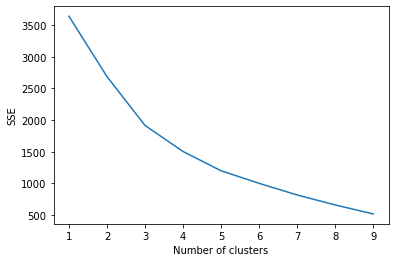

In [66]:
#find k
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(quality_onehot.drop('Area',axis=1))
    quality_onehot['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

### CLUSTERING

In [67]:
df = pd.read_csv('delhi_venues_data.csv')
df.head()

Unnamed: 0                   Area  Latitude  Longitude  \
0           0  Ajmeri Gate Extension  28.64366   77.22883   
1           1  Ajmeri Gate Extension  28.64366   77.22883   
2           2  Ajmeri Gate Extension  28.64366   77.22883   
3           3  Ajmeri Gate Extension  28.64366   77.22883   
4           4  Ajmeri Gate Extension  28.64366   77.22883   

                VenueName  VenueLatitude  VenueLongitude      VenueCategory  
0      Naturals Ice Cream      28.634455       77.222139     Ice Cream Shop  
1       Haveli Dharampura      28.653247       77.232309              Hotel  
2  Panchayat Paan Parlour      28.634073       77.222645  Indian Restaurant  
3             Sagar Ratna      28.635487       77.220650  Indian Restaurant  
4          Warehouse Cafe      28.633775       77.221015             Lounge

In [68]:
print('There are {} uniques categories.'.format(len(df['VenueCategory'].unique())))

There are 232 uniques categories.


In [69]:
print(df['VenueCategory'].unique())

['Ice Cream Shop' 'Hotel' 'Indian Restaurant' 'Lounge' 'Café' 'Plaza'
 'Clothing Store' 'Tibetan Restaurant' 'Bakery' 'South Indian Restaurant'
 'Restaurant' 'Molecular Gastronomy Restaurant' 'Arcade'
 'Fast Food Restaurant' 'Paper / Office Supplies Store' 'Dessert Shop'
 'Hardware Store' 'Chinese Restaurant' 'Italian Restaurant' 'Coffee Shop'
 'Mosque' 'Pizza Place' 'Bar' 'Food & Drink Shop' 'Asian Restaurant'
 'BBQ Joint' 'Gastropub' 'Road' 'North Indian Restaurant' 'Art Gallery'
 'Market' 'Snack Place' 'Theater' 'Indian Chinese Restaurant' 'Food'
 'Flea Market' 'Monument / Landmark' 'Breakfast Spot' 'Motel'
 'History Museum' 'Museum' 'Hostel' 'Cricket Ground' 'Pub'
 'Falafel Restaurant' 'Hindu Temple' 'Shopping Mall' 'Light Rail Station'
 'Gift Shop' 'Convenience Store' 'Bus Station' 'River' 'Moving Target'
 'Stadium' 'Movie Theater' 'Historic Site' 'Deli / Bodega'
 'English Restaurant' 'Park' 'Japanese Restaurant' 'Athletics & Sports'
 'Sandwich Place' 'Mediterranean Restaurant' 'I

In [70]:
quality_columns = ['Hotel', 'Restaurant', 'Stores', 'Market', 'Shopping Mall', 'Commute', 'Sports', 'University', 'ATM', 'Bank', 'Airport', 'Pharmacy', 'High School']

In [71]:
df['VenueCategory'] = np.where((df.VenueCategory == 'Clothing Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Paper / Office Supplies Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Convenience Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Department Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Electronics Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Big Box Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Grocery Store'),'Stores',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Fruit & Vegetable Store'),'Stores',df.VenueCategory)

df['VenueCategory'] = np.where((df.VenueCategory == 'Flea Market'),'Market',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Farmers Market'),'Market',df.VenueCategory)

df['VenueCategory'] = np.where((df.VenueCategory == 'Light Rail Station'),'Commute',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Bus Station'),'Commute',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Train Station'),'Commute',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Metro Station'),'Commute',df.VenueCategory)

df['VenueCategory'] = np.where((df.VenueCategory == 'Park'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Athletics & Sports'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Basketball Court'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Soccer Field'),'Sports',df.VenueCategory)

df['VenueCategory'] = np.where((df.VenueCategory == 'Playground'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Hockey Arena'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Soccer Stadium'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Pool'),'Sports',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Tennis Court'),'Sports',df.VenueCategory)

df['VenueCategory'] = np.where((df.VenueCategory == 'Gym / Fitness Center'),'Fitness',df.VenueCategory)
df['VenueCategory'] = np.where((df.VenueCategory == 'Gym'),'Fitness',df.VenueCategory)

In [72]:
quality_df = []
quality_df = df.loc[df['VenueCategory'].isin(quality_columns)]
quality_df

Unnamed: 0                   Area  Latitude  Longitude  \
1               1  Ajmeri Gate Extension  28.64366   77.22883   
7               7  Ajmeri Gate Extension  28.64366   77.22883   
10             10  Ajmeri Gate Extension  28.64366   77.22883   
12             12  Ajmeri Gate Extension  28.64366   77.22883   
20             20  Ajmeri Gate Extension  28.64366   77.22883   
...           ...                    ...       ...        ...   
16092       16092               Zafrabad  28.67970   77.27151   
16094       16094               Zafrabad  28.67970   77.27151   
16095       16095               Zafrabad  28.67970   77.27151   
16096       16096               Zafrabad  28.67970   77.27151   
16097       16097               Zafrabad  28.67970   77.27151   

                                               VenueName  VenueLatitude  \
1                                      Haveli Dharampura      28.653247   
7                 bloomrooms @ New Delhi Railway Station      28.645537   
10                                              Fabindia      28.632012   
12     The Prime Balaji Deluxe @ New Delhi Railway St...      28.645247   
20                           The Indian Grill Restaurant      28.646141   
...                                                  ...            ...   
16092                              Welcome Metro Station      28.671902   
16094                            Seelampur Metro Station      28.669805   
16095                                       Shivaji park      28.682657   
16096                                       yamuna vihar      28.689816   
16097                             Shahdara Metro Station      28.673344   

       VenueLongitude VenueCategory  
1           77.232309         Hotel  
7           77.217701         Hotel  
10          77.217729        Stores  
12          77.217433         Hotel  
20          77.215133    Restaurant  
...               ...           ...  
16092       77.277772       Commute  
16094       77.266846       Commute  
16095       77.285503        Sports  
16096       77.283876        Sports  
16097       77.289011       Commute  

[3458 rows x 8 columns]

In [73]:
print(quality_df['VenueCategory'].unique())

['Hotel' 'Stores' 'Restaurant' 'Market' 'Shopping Mall' 'Commute' 'Sports'
 'University' 'ATM' 'Bank' 'Airport' 'Pharmacy' 'High School']


In [74]:
quality_df.to_csv('final_quality.csv')

In [75]:
# one hot encoding
onehot = pd.get_dummies(quality_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Area'] = quality_df['Area'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
delhi_grouped = onehot.groupby('Area').mean().reset_index()
onehot.head()

Area  ATM  Airport  Bank  Commute  High School  Hotel  \
1   Ajmeri Gate Extension    0        0     0        0            0      1   
7   Ajmeri Gate Extension    0        0     0        0            0      1   
10  Ajmeri Gate Extension    0        0     0        0            0      0   
12  Ajmeri Gate Extension    0        0     0        0            0      1   
20  Ajmeri Gate Extension    0        0     0        0            0      0   

    Market  Pharmacy  Restaurant  Shopping Mall  Sports  Stores  University  
1        0         0           0              0       0       0           0  
7        0         0           0              0       0       0           0  
10       0         0           0              0       0       1           0  
12       0         0           0              0       0       0           0  
20       0         0           1              0       0       0           0

In [76]:
num_top_venues = 5
for hood in delhi_grouped['Area']:
    print("---- "+hood+" ----")
    temp =delhi_grouped[delhi_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- A F Rajokari ----
           venue  freq
0          Hotel  0.50
1  Shopping Mall  0.25
2         Stores  0.25
3            ATM  0.00
4        Airport  0.00


---- A G C R ----
           venue  freq
0        Commute  0.33
1  Shopping Mall  0.33
2     Restaurant  0.17
3         Stores  0.17
4            ATM  0.00


---- A P S Colony ----
           venue  freq
0          Hotel   0.3
1         Stores   0.2
2         Market   0.1
3     Restaurant   0.1
4  Shopping Mall   0.1


---- A T Mills ----
        venue  freq
0       Hotel   0.5
1  Restaurant   0.5
2         ATM   0.0
3     Airport   0.0
4        Bank   0.0


---- Adarsh Nagar ----
     venue  freq
0  Commute  0.50
1     Bank  0.25
2   Sports  0.25
3      ATM  0.00
4  Airport  0.00


---- Ajmeri Gate Extension ----
        venue  freq
0       Hotel  0.67
1      Market  0.17
2      Stores  0.11
3  Restaurant  0.06
4         ATM  0.00


---- Aliganj ----
        venue  freq
0      Market   0.3
1     Commute   0.2
2  Restaurant  

4            ATM  0.00


---- Fatehpuri ----
        venue  freq
0       Hotel  0.64
1      Market  0.18
2  Restaurant  0.09
3     Commute  0.05
4      Stores  0.05


---- Flatted Factories Complex ----
     venue  freq
0   Sports  0.67
1  Commute  0.33
2      ATM  0.00
3  Airport  0.00
4     Bank  0.00


---- G T S Nagar ----
     venue  freq
0  Commute  0.29
1    Hotel  0.29
2   Sports  0.29
3   Stores  0.14
4      ATM  0.00


---- Gandhi Nagar ----
     venue  freq
0   Sports   1.0
1      ATM   0.0
2  Airport   0.0
3     Bank   0.0
4  Commute   0.0


---- Gandhi Nagar Bazar ----
     venue  freq
0   Sports   1.0
1      ATM   0.0
2  Airport   0.0
3     Bank   0.0
4  Commute   0.0


---- Ganeshpuri ----
     venue  freq
0  Commute  0.67
1    Hotel  0.11
2   Market  0.11
3   Sports  0.11
4      ATM  0.00


---- Geeta Colony ----
     venue  freq
0   Sports   1.0
1      ATM   0.0
2  Airport   0.0
3     Bank   0.0
4  Commute   0.0


---- Gobindpura ----
           venue  freq
0  Shopping

4      Stores  0.13


---- Lok Nagar Bhawan ----
        venue  freq
0       Hotel  0.50
1     Commute  0.25
2      Market  0.12
3  Restaurant  0.12
4         ATM  0.00


---- Lok Nayak Bhawan ----
        venue  freq
0       Hotel  0.40
1  Restaurant  0.27
2      Sports  0.20
3     Commute  0.07
4      Market  0.07


---- Loni Road ----
     venue  freq
0  Commute   0.5
1   Sports   0.5
2      ATM   0.0
3  Airport   0.0
4     Bank   0.0


---- Lower Camp Anand Parbat ----
     venue  freq
0  Commute  0.62
1    Hotel  0.12
2   Market  0.12
3   Sports  0.12
4      ATM  0.00


---- Madangir ----
           venue  freq
0         Stores  0.37
1          Hotel  0.32
2     Restaurant  0.16
3  Shopping Mall  0.11
4         Market  0.05


---- Madipur ----
     venue  freq
0  Commute   0.6
1   Market   0.2
2   Sports   0.2
3      ATM   0.0
4  Airport   0.0


---- Mahabir Nagar ----
           venue  freq
0        Commute  0.29
1         Stores  0.29
2         Market  0.14
3     Restaurant  0.1

4            ATM   0.0


---- Patrachar Road ----
           venue  freq
0  Shopping Mall  0.33
1         Stores  0.25
2        Commute  0.17
3          Hotel  0.17
4        Airport  0.08


---- Patrachar Vidyala ----
           venue  freq
0  Shopping Mall  0.33
1         Stores  0.25
2        Commute  0.17
3          Hotel  0.17
4        Airport  0.08


---- Pitampura ----
           venue  freq
0        Commute  0.44
1  Shopping Mall  0.22
2        Airport  0.11
3          Hotel  0.11
4         Sports  0.11


---- Possangipur ----
           venue  freq
0        Commute  0.43
1         Stores  0.29
2     Restaurant  0.14
3  Shopping Mall  0.14
4            ATM  0.00


---- Postal Saving Bureau ----
        venue  freq
0       Hotel  0.73
1  Restaurant  0.18
2     Commute  0.05
3      Stores  0.05
4         ATM  0.00


---- Power House ----
        venue  freq
0      Market  0.24
1  Restaurant  0.24
2       Hotel  0.18
3      Sports  0.18
4     Commute  0.06


---- Pragati Maidan ---

4            ATM   0.0


---- Tilak Nagar East ----
           venue  freq
0         Stores  0.38
1        Commute  0.25
2         Market  0.12
3     Restaurant  0.12
4  Shopping Mall  0.12


---- Timarpur ----
        venue  freq
0  Restaurant   1.0
1         ATM   0.0
2     Airport   0.0
3        Bank   0.0
4     Commute   0.0


---- Trilokpuri ----
           venue  freq
0          Hotel  0.25
1         Market  0.25
2  Shopping Mall  0.25
3         Stores  0.25
4            ATM  0.00


---- Tughlakabad ----
        venue  freq
0     Commute   0.4
1  Restaurant   0.4
2       Hotel   0.2
3         ATM   0.0
4     Airport   0.0


---- Tughlakabad A F Station ----
        venue  freq
0     Commute   0.4
1  Restaurant   0.4
2       Hotel   0.2
3         ATM   0.0
4     Airport   0.0


---- U P S C ----
        venue  freq
0      Market  0.33
1     Commute  0.25
2       Hotel  0.17
3      Stores  0.17
4  Restaurant  0.08


---- Udyog Bhawan ----
        venue  freq
0       Hotel  0.29
1  

In [77]:
delhi_grouped

Area       ATM   Airport      Bank   Commute  \
0                    A F Rajokari  0.000000  0.000000  0.000000  0.000000   
1                         A G C R  0.000000  0.000000  0.000000  0.333333   
2                    A P S Colony  0.000000  0.000000  0.000000  0.000000   
3                       A T Mills  0.000000  0.000000  0.000000  0.000000   
4                    Adarsh Nagar  0.000000  0.000000  0.250000  0.500000   
5           Ajmeri Gate Extension  0.000000  0.000000  0.000000  0.000000   
6                         Aliganj  0.000000  0.000000  0.000000  0.200000   
7                          Alipur  0.000000  0.000000  0.000000  0.500000   
8                     Amar Colony  0.250000  0.000000  0.000000  0.500000   
9                  Ambedkar Nagar  0.000000  0.000000  0.000000  0.000000   
10                        Ambrohi  0.000000  0.000000  0.000000  0.045455   
11              Amrit Kaur Market  0.000000  0.000000  0.000000  0.040000   
12                    Anand Nagar  0.000000  0.000000  0.000000  0.625000   
13                  Anand Niketan  0.000000  0.000000  0.000000  0.000000   
14                   Anand Parbat  0.000000  0.000000  0.000000  0.625000   
15             Anandvas Shakurpur  0.000000  0.000000  0.000000  0.500000   
16                       Anarkali  0.000000  0.000000  0.000000  0.400000   
17                   Andrews Ganj  0.000000  0.000000  0.000000  0.000000   
18                    Ansari Road  0.000000  0.000000  0.000000  0.000000   
19                     Arjan Garh  0.000000  0.000000  0.000000  0.200000   
20                      Army Base  0.000000  0.000000  0.000000  0.200000   
21                    Ashok Nagar  0.000000  0.000000  0.000000  0.333333   
22                Ashok Vihar H O  0.000000  0.000000  0.000000  0.000000   
23                   Ashoka Hotel  0.000000  0.000000  0.000000  0.166667   
24            Asian Games Village  0.000000  0.000000  0.000000  0.000000   
25                     Azad Nagar  0.000000  0.000000  0.000000  0.200000   
26                       Badarpur  0.000000  0.000000  0.000000  1.000000   
27           Badarpur T P Station  0.000000  0.000000  0.000000  1.000000   
28                          Badli  0.000000  0.000000  0.000000  0.250000   
29                   Balbir Nagar  0.000000  0.000000  0.000000  0.600000   
30                    Bank Street  0.000000  0.000000  0.000000  0.166667   
31                     Bara Tooti  0.000000  0.000000  0.000000  0.000000   
32                         Bawana  0.000000  0.000000  0.000000  0.000000   
33                     Bazar Road  0.000000  0.000000  0.000000  0.105263   
34           Bhaiparma Nand Nagar  0.400000  0.000000  0.000000  0.000000   
35                    Bhajan Pura  1.000000  0.000000  0.000000  0.000000   
36                     Bhajanpuri  1.000000  0.000000  0.000000  0.000000   
37                   Bharat Nagar  0.000000  0.000000  0.000000  0.166667   
38               Bhola Nath Nagar  0.000000  0.000000  0.000000  0.166667   
39                       Bijwasan  0.000000  0.000000  0.000000  0.000000   
40                    Birla Lines  0.000000  0.000000  0.000000  0.500000   
41                  C C Institute  0.000000  0.000000  0.000000  0.000000   
42                   C R P F Camp  0.000000  0.000000  0.000000  0.000000   
43                        C R R I  0.000000  0.000000  0.000000  0.090909   
44            Central Kirti Nagar  0.000000  0.000000  0.000000  0.538462   
45              Central Ordinance  0.000000  0.000000  0.000000  0.000000   
46                Central Tractor  0.000000  0.000000  0.000000  0.000000   
47                Central Vehicle  0.000000  0.000000  0.000000  0.000000   
48                    Chand Nagar  0.000000  0.000000  0.000000  0.125000   
49                  Chandni Chowk  0.000000  0.000000  0.000000  0.117647   
50                    Chankyapuri  0.000000  0.000000  0.000000  0.125000   
51                   Chaw

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Area'] = delhi_grouped['Area']

for ind in np.arange(delhi_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

Area 1st Most Common Venue 2nd Most Common Venue  \
0  A F Rajokari                 Hotel                Stores   
1       A G C R         Shopping Mall               Commute   
2  A P S Colony                 Hotel                Stores   
3     A T Mills            Restaurant                 Hotel   
4  Adarsh Nagar               Commute                Sports   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Shopping Mall            University                Sports   
1                Stores            Restaurant            University   
2            University                Sports         Shopping Mall   
3            University                Stores                Sports   
4                  Bank            University                Stores   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Restaurant              Pharmacy                Market   
1                Sports              Pharmacy                Market   
2            Restaurant                Market              Pharmacy   
3         Shopping Mall              Pharmacy                Market   
4         Shopping Mall            Restaurant              Pharmacy   

  9th Most Common Venue 10th Most Common Venue  
0           High School                Commute  
1                 Hotel            High School  
2           High School                Commute  
3           High School                Commute  
4                Market                  Hotel

In [81]:
# Using K-Means to cluster neighborhood into 3 clusters
delhi_grouped_clustering = delhi_grouped.drop('Area', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(delhi_grouped_clustering)
kmeans.labels_

array([0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2,

In [82]:
# Data frame consisting of venues and clusters
venues_sorted['Clusters'] = kmeans.labels_
venues_sorted

Area 1st Most Common Venue 2nd Most Common Venue  \
0                    A F Rajokari                 Hotel                Stores   
1                         A G C R         Shopping Mall               Commute   
2                    A P S Colony                 Hotel                Stores   
3                       A T Mills            Restaurant                 Hotel   
4                    Adarsh Nagar               Commute                Sports   
5           Ajmeri Gate Extension                 Hotel                Market   
6                         Aliganj                Market                Sports   
7                          Alipur            Restaurant               Commute   
8                     Amar Colony               Commute                Sports   
9                  Ambedkar Nagar                Stores                 Hotel   
10                        Ambrohi                 Hotel            Restaurant   
11              Amrit Kaur Market                 Hotel                Stores   
12                    Anand Nagar               Commute                Sports   
13                  Anand Niketan                Sports            University   
14                   Anand Parbat               Commute                Sports   
15             Anandvas Shakurpur         Shopping Mall               Commute   
16                       Anarkali               Commute                Sports   
17                   Andrews Ganj                Market                Stores   
18                    Ansari Road                Market                 Hotel   
19                     Arjan Garh            Restaurant                 Hotel   
20                      Army Base                 Hotel            Restaurant   
21                    Ashok Nagar                Sports               Commute   
22                Ashok Vihar H O                Stores         Shopping Mall   
23                   Ashoka Hotel                 Hotel                Stores   
24            Asian Games Village                Market                Sports   
25                     Azad Nagar                Stores                Sports   
26                       Badarpur               Commute            University   
27           Badarpur T P Station               Commute            University   
28                          Badli                Stores                 Hotel   
29                   Balbir Nagar               Commute                Sports   
30                    Bank Street                 Hotel                Stores   
31                     Bara Tooti                 Hotel            Restaurant   
32                         Bawana                Sports            University   
33                     Bazar Road                 Hotel                Sports   
34           Bhaiparma Nand Nagar                Stores                   ATM   
35                    Bhajan Pura                   ATM            University   
36                     Bhajanpuri                   ATM            University   
37                   Bharat Nagar                 Hotel                Sports   
38               Bhola Nath Nagar                 Hotel                Stores   
39                       Bijwasan                Sports            University   
40                    Birla Lines               Commute                Stores   
41                  C C Institute                Stores            Restaurant   
42                   C R P F Camp                Market            University   
43                        C R R I                 Hotel            Restaurant   
44            Central Kirti Nagar               Commute            Restaurant   
45              Central Ordinance                Stores         Shopping Mall   
46                Central Tractor                 Hotel                Market   
47                Central Vehicle                 Hotel                Market   
48                    Chand Nagar                Stores     

In [83]:
venues_sorted.to_csv('venues_clustered.csv')

### DATA VISUALIZATION

In [84]:
venues_sorted = pd.read_csv('venues_clustered.csv', index_col=[0])

In [85]:
df = pd.read_csv('delhi_latlong.csv', index_col=[0])

In [86]:
venues_sorted

Area 1st Most Common Venue 2nd Most Common Venue  \
0                    A F Rajokari                 Hotel                Stores   
1                         A G C R         Shopping Mall               Commute   
2                    A P S Colony                 Hotel                Stores   
3                       A T Mills            Restaurant                 Hotel   
4                    Adarsh Nagar               Commute                Sports   
5           Ajmeri Gate Extension                 Hotel                Market   
6                         Aliganj                Market                Sports   
7                          Alipur            Restaurant               Commute   
8                     Amar Colony               Commute                Sports   
9                  Ambedkar Nagar                Stores                 Hotel   
10                        Ambrohi                 Hotel            Restaurant   
11              Amrit Kaur Market                 Hotel                Stores   
12                    Anand Nagar               Commute                Sports   
13                  Anand Niketan                Sports            University   
14                   Anand Parbat               Commute                Sports   
15             Anandvas Shakurpur         Shopping Mall               Commute   
16                       Anarkali               Commute                Sports   
17                   Andrews Ganj                Market                Stores   
18                    Ansari Road                Market                 Hotel   
19                     Arjan Garh            Restaurant                 Hotel   
20                      Army Base                 Hotel            Restaurant   
21                    Ashok Nagar                Sports               Commute   
22                Ashok Vihar H O                Stores         Shopping Mall   
23                   Ashoka Hotel                 Hotel                Stores   
24            Asian Games Village                Market                Sports   
25                     Azad Nagar                Stores                Sports   
26                       Badarpur               Commute            University   
27           Badarpur T P Station               Commute            University   
28                          Badli                Stores                 Hotel   
29                   Balbir Nagar               Commute                Sports   
30                    Bank Street                 Hotel                Stores   
31                     Bara Tooti                 Hotel            Restaurant   
32                         Bawana                Sports            University   
33                     Bazar Road                 Hotel                Sports   
34           Bhaiparma Nand Nagar                Stores                   ATM   
35                    Bhajan Pura                   ATM            University   
36                     Bhajanpuri                   ATM            University   
37                   Bharat Nagar                 Hotel                Sports   
38               Bhola Nath Nagar                 Hotel                Stores   
39                       Bijwasan                Sports            University   
40                    Birla Lines               Commute                Stores   
41                  C C Institute                Stores            Restaurant   
42                   C R P F Camp                Market            University   
43                        C R R I                 Hotel            Restaurant   
44            Central Kirti Nagar               Commute            Restaurant   
45              Central Ordinance                Stores         Shopping Mall   
46                Central Tractor                 Hotel                Market   
47                Central Vehicle                 Hotel                Market   
48                    Chand Nagar                Stores     

In [87]:
df

Area Name  Pin Code   Latitude  Longitude
0           Ajmeri Gate Extension    110002  28.643660  77.228830
1                         A G C R    110002  28.630798  77.275803
2                     Ansari Road    110002  28.646000  77.243870
3                         Aliganj    110003  28.583540  77.218560
4                    Anand Parbat    110005  28.665960  77.173220
5                     Anand Nagar    110005  28.674490  77.167560
6                       Army Base    110010  28.646170  77.176910
7                    A P S Colony    110010  28.575230  77.178230
8                       A F Palam    110010  28.591060  77.091170
9                          Ashram    110016  28.717960  77.003960
10                    Ashok Nagar    110018  28.692230  77.301240
11                   Ashoka Hotel    110021  28.653030  77.191650
12                  Anand Niketan    110021  28.575550  77.161030
13                    Amar Colony    110024  28.678440  77.049390
14                   Adarsh Nagar    110033  28.720350  77.172640
15                      A T Mills    110033  29.683990  76.991170
16             Anandvas Shakurpur    110034  28.682240  77.139770
17                         Alipur    110036  28.798050  77.144260
18                   A F Rajokari    110038  28.519370  77.121260
19                        Ambrohi    110045  28.634100  77.216890
20                     Arjan Garh    110047  28.479920  77.125420
21            Asian Games Village    110049  28.553310  77.214570
22                   Andrews Ganj    110049  28.563440  77.228970
23                     Azad Nagar    110051  28.664210  77.281120
24                       Anarkali    110051  28.693210  77.171900
25                Ashok Vihar H O    110052  28.410000  77.842450
26              Amrit Kaur Market    110055  28.643040  77.218180
27                 Ambedkar Nagar    110062  28.519490  77.235000
28                    Bank Street    110005  28.652903  77.190446
29                     Bara Tooti    110006  28.659770  77.213260
30                    Birla Lines    110007  28.676210  77.197160
31                     Bazar Road    110010  28.629764  77.231534
32               Bhola Nath Nagar    110032  28.672018  77.288615
33                   Balbir Nagar    110032  28.682480  77.289640
34           Bhaiparma Nand Nagar    110033  28.696710  77.303850
35                         Bawana    110039  28.800590  77.034730
36                     Budh Nagar    110041  28.634010  77.143380
37                          Badli    110042  28.731650  77.134060
38           Badarpur T P Station    110044  28.507380  77.303460
39                       Badarpur    110044  28.507380  77.303460
40                        Bakrola    110045  28.639220  77.012510
41                   Bharat Nagar    110052  28.566320  77.270110
42                     Bhajanpuri    110053  28.699880  77.259060
43                     Brahampuri    110053  28.653670  77.031250
44                       Bijwasan    110061  28.531910  77.052360
45               B S F Camp Tigri    110062  28.510210  77.237450
46                    Bhajan Pura    110096  28.699880  77.259060
47                Connaught Place    110001  28.633940  77.219680
48             Constitution House    110001  28.619820  77.212580
49                   Chawri Bazar    110006  28.648580  77.230710
50                  Chandni Chowk    110006  28.656270  77.232320
51                  C C Institute    110007  28.698040  77.206060
52              Central Ordinance    110010  28.596380  77.133010
53                Central Vehicle    110010  28.647112  77.219765
54                Central Tractor    110012  28.647112  77.219765
55            Central Kirti Nagar    110015  28.652980  77.142170
56                    Chand Nagar    110018  28.648070  77.096460
57                        C R R I    110020  28.653810  77.228970
58                    Chankyapuri    110021  28.595060  77.185730
59                    Civil Lines    110054  28.676710  77.21767

In [88]:
df['Area'] = df['Area Name']
del df['Area Name']
df

Pin Code   Latitude  Longitude                          Area
0      110002  28.643660  77.228830         Ajmeri Gate Extension
1      110002  28.630798  77.275803                       A G C R
2      110002  28.646000  77.243870                   Ansari Road
3      110003  28.583540  77.218560                       Aliganj
4      110005  28.665960  77.173220                  Anand Parbat
5      110005  28.674490  77.167560                   Anand Nagar
6      110010  28.646170  77.176910                     Army Base
7      110010  28.575230  77.178230                  A P S Colony
8      110010  28.591060  77.091170                     A F Palam
9      110016  28.717960  77.003960                        Ashram
10     110018  28.692230  77.301240                   Ashok Nagar
11     110021  28.653030  77.191650                  Ashoka Hotel
12     110021  28.575550  77.161030                 Anand Niketan
13     110024  28.678440  77.049390                   Amar Colony
14     110033  28.720350  77.172640                  Adarsh Nagar
15     110033  29.683990  76.991170                     A T Mills
16     110034  28.682240  77.139770            Anandvas Shakurpur
17     110036  28.798050  77.144260                        Alipur
18     110038  28.519370  77.121260                  A F Rajokari
19     110045  28.634100  77.216890                       Ambrohi
20     110047  28.479920  77.125420                    Arjan Garh
21     110049  28.553310  77.214570           Asian Games Village
22     110049  28.563440  77.228970                  Andrews Ganj
23     110051  28.664210  77.281120                    Azad Nagar
24     110051  28.693210  77.171900                      Anarkali
25     110052  28.410000  77.842450               Ashok Vihar H O
26     110055  28.643040  77.218180             Amrit Kaur Market
27     110062  28.519490  77.235000                Ambedkar Nagar
28     110005  28.652903  77.190446                   Bank Street
29     110006  28.659770  77.213260                    Bara Tooti
30     110007  28.676210  77.197160                   Birla Lines
31     110010  28.629764  77.231534                    Bazar Road
32     110032  28.672018  77.288615              Bhola Nath Nagar
33     110032  28.682480  77.289640                  Balbir Nagar
34     110033  28.696710  77.303850          Bhaiparma Nand Nagar
35     110039  28.800590  77.034730                        Bawana
36     110041  28.634010  77.143380                    Budh Nagar
37     110042  28.731650  77.134060                         Badli
38     110044  28.507380  77.303460          Badarpur T P Station
39     110044  28.507380  77.303460                      Badarpur
40     110045  28.639220  77.012510                       Bakrola
41     110052  28.566320  77.270110                  Bharat Nagar
42     110053  28.699880  77.259060                    Bhajanpuri
43     110053  28.653670  77.031250                    Brahampuri
44     110061  28.531910  77.052360                      Bijwasan
45     110062  28.510210  77.237450              B S F Camp Tigri
46     110096  28.699880  77.259060                   Bhajan Pura
47     110001  28.633940  77.219680               Connaught Place
48     110001  28.619820  77.212580            Constitution House
49     110006  28.648580  77.230710                  Chawri Bazar
50     110006  28.656270  77.232320                 Chandni Chowk
51     110007  28.698040  77.206060                 C C Institute
52     110010  28.596380  77.133010             Central Ordinance
53     110010  28.647112  77.219765               Central Vehicle
54     110012  28.647112  77.219765               Central Tractor
55     110015  28.652980  77.142170           Central Kirti Nagar
56     110018  28.648070  77.096460                   Chand Nagar
57     110020  28.653810  77.228970                       C R R I
58     110021  28.595060  77.185730                   Chankyapuri
59     110054  28.676710  77.217670          

In [101]:
final_df = pd.merge(venues_sorted,df,on='Area',how='left')
final_df

Area 1st Most Common Venue 2nd Most Common Venue  \
0                    A F Rajokari                 Hotel                Stores   
1                         A G C R         Shopping Mall               Commute   
2                    A P S Colony                 Hotel                Stores   
3                       A T Mills            Restaurant                 Hotel   
4                    Adarsh Nagar               Commute                Sports   
5           Ajmeri Gate Extension                 Hotel                Market   
6                         Aliganj                Market                Sports   
7                          Alipur            Restaurant               Commute   
8                     Amar Colony               Commute                Sports   
9                  Ambedkar Nagar                Stores                 Hotel   
10                        Ambrohi                 Hotel            Restaurant   
11              Amrit Kaur Market                 Hotel                Stores   
12                    Anand Nagar               Commute                Sports   
13                  Anand Niketan                Sports            University   
14                   Anand Parbat               Commute                Sports   
15             Anandvas Shakurpur         Shopping Mall               Commute   
16                       Anarkali               Commute                Sports   
17                   Andrews Ganj                Market                Stores   
18                    Ansari Road                Market                 Hotel   
19                     Arjan Garh            Restaurant                 Hotel   
20                      Army Base                 Hotel            Restaurant   
21                    Ashok Nagar                Sports               Commute   
22                Ashok Vihar H O                Stores         Shopping Mall   
23                   Ashoka Hotel                 Hotel                Stores   
24            Asian Games Village                Market                Sports   
25                     Azad Nagar                Stores                Sports   
26                       Badarpur               Commute            University   
27           Badarpur T P Station               Commute            University   
28                          Badli                Stores                 Hotel   
29                   Balbir Nagar               Commute                Sports   
30                    Bank Street                 Hotel                Stores   
31                     Bara Tooti                 Hotel            Restaurant   
32                         Bawana                Sports            University   
33                     Bazar Road                 Hotel                Sports   
34           Bhaiparma Nand Nagar                Stores                   ATM   
35                    Bhajan Pura                   ATM            University   
36                     Bhajanpuri                   ATM            University   
37                   Bharat Nagar                 Hotel                Sports   
38               Bhola Nath Nagar                 Hotel                Stores   
39                       Bijwasan                Sports            University   
40                    Birla Lines               Commute                Stores   
41                  C C Institute                Stores            Restaurant   
42                   C R P F Camp                Market            University   
43                        C R R I                 Hotel            Restaurant   
44            Central Kirti Nagar               Commute            Restaurant   
45              Central Ordinance                Stores         Shopping Mall   
46                Central Tractor                 Hotel                Market   
47                Central Vehicle                 Hotel                Market   
48                    Chand Nagar                Stores     

### Visualizing clusters

In [102]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [107]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(final_df['Latitude'], 
                                   final_df['Longitude'], 
                                   final_df['Area'], 
                                   final_df['Clusters']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [108]:
# save the map as HTML file
map_clusters.save('clusters_map.html')

### EXAMINE CLUSTERS

### Cluster 1

In [112]:
final_df.loc[final_df['Clusters'] == 0, final_df.columns[list(range(0, final_df.shape[1]))]]

Area 1st Most Common Venue 2nd Most Common Venue  \
0                 A F Rajokari                 Hotel                Stores   
3                    A T Mills            Restaurant                 Hotel   
5        Ajmeri Gate Extension                 Hotel                Market   
10                     Ambrohi                 Hotel            Restaurant   
11           Amrit Kaur Market                 Hotel                Stores   
18                 Ansari Road                Market                 Hotel   
19                  Arjan Garh            Restaurant                 Hotel   
20                   Army Base                 Hotel            Restaurant   
23                Ashoka Hotel                 Hotel                Stores   
30                 Bank Street                 Hotel                Stores   
31                  Bara Tooti                 Hotel            Restaurant   
33                  Bazar Road                 Hotel                Sports   
37                Bharat Nagar                 Hotel                Sports   
38            Bhola Nath Nagar                 Hotel                Stores   
43                     C R R I                 Hotel            Restaurant   
46             Central Tractor                 Hotel                Market   
47             Central Vehicle                 Hotel                Market   
49               Chandni Chowk                 Hotel                Market   
50                 Chankyapuri                 Hotel                Sports   
51                Chawri Bazar                 Hotel            Restaurant   
52              Chilla Villege                 Hotel            Restaurant   
54             Connaught Place                 Hotel            Restaurant   
55          Constitution House                 Hotel            Restaurant   
58                    D I Area                 Hotel            Restaurant   
62                     Dareeba                 Hotel                Stores   
66            Defence Head Qrs                 Hotel            Restaurant   
68           Delhi Cloth Mills                 Hotel                Market   
69                 Delhi G P O                 Hotel            Restaurant   
74      Desh Bandhu Gupta Road                 Hotel            Restaurant   
75                Dhaula Khuan                Sports                 Hotel   
80               Eastern Court                 Hotel                Stores   
81         Election Commission                 Hotel            Restaurant   
82                 Farashkhana                 Hotel                Market   
84                   Fatehpuri                 Hotel                Market   
93                  Golf Links                 Hotel                Sports   
102               Gurgaon Road                 Hotel            Restaurant   
106          Hamdard Dawakhana                 Hotel                Market   
107          Hari Nagar Ashram                 Hotel                Stores   
108        Hari Nagar Be Block                 Hotel                Market   
113                  Hauz Qazi                 Hotel                Market   
114          Hazrat Nizamuddin                 Hotel                Sports   
116                 Himmatpuri                 Hotel                Stores   
118         Idgah Road I S B T                 Hotel                Sports   
121         Indian Agriculture                Market                 Hotel   
131                Jama Masjid                 Hotel                Market   
138                    Janpath            Restaurant                 Hotel   
141  Jawahar Lal Nehru Stadium                Market                 Hotel   
142  Jawahar Lal Nehru Univers                 Hotel               Commute   
146                Joshi Nagar                 Hotel                Stores   
153                 Kalyanpuri                Sports                Market   
157                 Karol Bagh                 H

### Cluster 2

In [113]:
final_df.loc[final_df['Clusters'] == 1, final_df.columns[list(range(0, final_df.shape[1]))]]

Area 1st Most Common Venue 2nd Most Common Venue  \
1                         A G C R         Shopping Mall               Commute   
2                    A P S Colony                 Hotel                Stores   
6                         Aliganj                Market                Sports   
9                  Ambedkar Nagar                Stores                 Hotel   
13                  Anand Niketan                Sports            University   
17                   Andrews Ganj                Market                Stores   
22                Ashok Vihar H O                Stores         Shopping Mall   
24            Asian Games Village                Market                Sports   
25                     Azad Nagar                Stores                Sports   
28                          Badli                Stores                 Hotel   
34           Bhaiparma Nand Nagar                Stores                   ATM   
35                    Bhajan Pura                   ATM            University   
36                     Bhajanpuri                   ATM            University   
41                  C C Institute                Stores            Restaurant   
42                   C R P F Camp                Market            University   
45              Central Ordinance                Stores         Shopping Mall   
48                    Chand Nagar                Stores            Restaurant   
56                  D D A Munirka                Stores         Shopping Mall   
57                    D D A Salam                   ATM                Stores   
59              Dada Ghosh Bhawan                Stores         Shopping Mall   
60            Dakshimpuri Phase I                Stores                 Hotel   
61          Dakshinpuri Phase III                Stores                 Hotel   
65                 Defence Colony                Market            Restaurant   
67                    Delhi Cantt                Stores         Shopping Mall   
70               Delhi High Court                Stores            University   
71              Delhi Sadar Bazar                Stores         Shopping Mall   
72               Delhi University                Stores                Sports   
78                 E S I Hospital                Stores         Shopping Mall   
79                East Of Kailash                Market                Stores   
83                    Fateh Nagar                Stores            Restaurant   
91                     Gobindpura         Shopping Mall                Stores   
92                      Gokulpuri                   ATM                Stores   
94                     Govindpuri                Market            Restaurant   
95                Greater Kailash                Market                Stores   
96             Greater Kailash Ii                Market                Stores   
97                     Green Park                Market                Sports   
98              Green Park Market                Market                Sports   
99                   Guatam Nagar                Market                Sports   
100      Gujranwala Nagar Part Ii                Stores            Restaurant   
101                 Gulmohar Park                Sports            Restaurant   
104                 Gymkhana Club                Sports                Stores   
105                     Haiderpur                Stores               Commute   
109      Hari Nagar Da & Db Block                Stores                Market   
110           Harijan Sewak Sangh                Stores            Restaurant   
111                     Hauz Khas                Sports            Restaurant   
112              Hauz Khas Market                Sports            Restaurant   
115               Himayunpur Extn                Market            Restaurant   
117               I I T Hauz Khas            Restaurant                Sports   
120                     Inderpuri                Stores     

### Cluster 3

In [114]:
final_df.loc[final_df['Clusters'] == 2, final_df.columns[list(range(0, final_df.shape[1]))]]

Area 1st Most Common Venue 2nd Most Common Venue  \
4                 Adarsh Nagar               Commute                Sports   
7                       Alipur            Restaurant               Commute   
8                  Amar Colony               Commute                Sports   
12                 Anand Nagar               Commute                Sports   
14                Anand Parbat               Commute                Sports   
15          Anandvas Shakurpur         Shopping Mall               Commute   
16                    Anarkali               Commute                Sports   
21                 Ashok Nagar                Sports               Commute   
26                    Badarpur               Commute            University   
27        Badarpur T P Station               Commute            University   
29                Balbir Nagar               Commute                Sports   
32                      Bawana                Sports            University   
39                    Bijwasan                Sports            University   
40                 Birla Lines               Commute                Stores   
44         Central Kirti Nagar               Commute            Restaurant   
53                 Civil Lines               Commute                Stores   
63              Dargah Shareef               Commute                Sports   
64                  Darya Ganj                Sports               Commute   
73                       Depot                Sports            University   
76              Dilshad Garden                Sports                 Hotel   
77                Distt Courts               Commute                Stores   
85   Flatted Factories Complex                Sports               Commute   
86                 G T S Nagar                Sports                 Hotel   
87                Gandhi Nagar                Sports            University   
88          Gandhi Nagar Bazar                Sports            University   
89                  Ganeshpuri               Commute                Sports   
90                Geeta Colony                Sports            University   
103     Guru Gobind Singh Marg                Sports               Commute   
119                   Inderlok               Commute                Sports   
122        Indraprastha Estate                Sports               Commute   
124            Industrial Area                Sports                 Hotel   
125            Industrial Area                Sports                 Hotel   
128       Jahangirpuri Block A               Commute                  Bank   
129       Jahangirpuri Block D               Commute                Stores   
130       Jahangirpuri Block H               Commute                 Hotel   
132                Jamia Nagar                Sports                 Hotel   
139               Janta Market         Shopping Mall               Commute   
144                  Jawalpuri               Commute                Stores   
145                Jeewan Park                Sports         Shopping Mall   
147               Kabool Nagar                Sports                Stores   
148                    Kailash               Commute                Sports   
150              Kailash Nagar               Commute            University   
154                Kamla Nagar               Commute                Stores   
155                  Karampura               Commute         Shopping Mall   
166                Kirti Nagar               Commute            Restaurant   
175              Lawrence Road               Commute                Sports   
177         Laxmi Nagar Market         Shopping Mall               Commute   
178         Laxminarain Mandir               Commute            University   
179                Lekhu Nagar               Commute                Sports   
185                  Loni Road                Sports               Commute   
186    Lower Camp Anand Parbat               Com

## END